In [71]:
#Imports
import itertools
import json
from collections import Counter
import pandas as pd
import numpy as np
import os

In [72]:
#Constants
BASE_FOLDER = "TestResults/FullResultOnlyHPFVNew/"
BASE_START = "OnlyHpfv_List_"
BASE_MID = "_SnipLen_"
BASE_END = "_Results.jsonl"
SNIPPET_LENS = [5,10,25,50,75,100]


In [73]:
def helperParser(file):
    temp = []
    with open(file, 'r') as f:
        for line in f:
            it = json.loads(line)
            it['sniplen'] = file[file.find(BASE_MID)+9:file.find(BASE_END)]
            temp.append(it)
    return temp

In [74]:
loaded = []
for i in range(100):
    loaded.append(helperParser(BASE_FOLDER+BASE_START+str(i)+BASE_MID+'5'+BASE_END))
    loaded.append(helperParser(BASE_FOLDER+BASE_START+str(i)+BASE_MID+'10'+BASE_END))
    loaded.append(helperParser(BASE_FOLDER+BASE_START+str(i)+BASE_MID+'25'+BASE_END))
    loaded.append(helperParser(BASE_FOLDER+BASE_START+str(i)+BASE_MID+'50'+BASE_END))
    loaded.append(helperParser(BASE_FOLDER+BASE_START+str(i)+BASE_MID+'75'+BASE_END))
    loaded.append(helperParser(BASE_FOLDER+BASE_START+str(i)+BASE_MID+'100'+BASE_END))

In [75]:
def helperParser2(temp_list: list[dict], key: str):
    return [x[key] for x in temp_list]

def flattenList(temp_list):
    return [x for y in temp_list for x in y]

In [76]:
df = pd.DataFrame.from_dict(flattenList(loaded))
df['sniplen'] = df['sniplen'].apply(lambda x: int(x))

In [77]:
print(df[(df['c']==120) & (df['sniplen'] == 100)].sort_values('f1'))

Empty DataFrame
Columns: [keylist_id, f1, labels, conf_matrix, c, tol, penalty, c_eval_scores, important_features_for_13+, important_features_for_7-8, important_features_for_9-12, sniplen]
Index: []


In [78]:
param_df = df[['keylist_id','sniplen','c','f1']]

## Param_df plots

In [79]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns

#Consts
cs = param_df['c'].drop_duplicates().to_numpy()

In [80]:
#Lineplot showing how c affects the accuracy of different sniplens

def getLineplot():
    for sniplen in SNIPPET_LENS:
        snip_df = param_df[param_df['sniplen'] == sniplen]
        ax = sns.lineplot(data=snip_df, x='c', y='f1', estimator='mean', errorbar=('ci', 99), n_boot=1000)
        #ax.set_ylim(0, 0.6)
        ax.text(1.1, ax.lines[-1].get_ydata()[-2]-0.005, sniplen, bbox={'color':plt.gca().lines[-1].get_color()})
    lbls = []
    for l in SNIPPET_LENS:
        lbls.append(str(l))
        lbls.append(str(l)+"_99%_ci")
    

## Plot accuracy and keylist_id (with different c's)

In [81]:
def getLineplotKeylists(sniplen):
    start = 0
    increment = 0.05
    snip_df = param_df[(param_df['sniplen'] == sniplen)].sort_values('f1')
    snip_df['keylist_id'] = snip_df['keylist_id'].apply(lambda x: str(x))
    ax = sns.lineplot(data=snip_df, x='keylist_id', y='f1', sort=False)
    #ax.set_xticks(snip_df['keylist_id'].to_numpy())
    #ax = sns.lineplot(data=snip_df, x='keylist_id', y='f1', estimator='mean', errorbar=('ci', 99), n_boot=1000)
    #ax.set_ylim(0, 0.7)
    #if sniplen == 5:
    #    start = ax.lines[-1].get_ydata()[-1]-increment
    #ax.text(107, start+increment, sniplen, bbox=dict(facecolor=ax.lines[-1].get_color(), alpha=0.7))
    start += increment
    lbls = []
    for l in SNIPPET_LENS:
        lbls.append(str(l))
        lbls.append(str(l)+"_99%_ci")

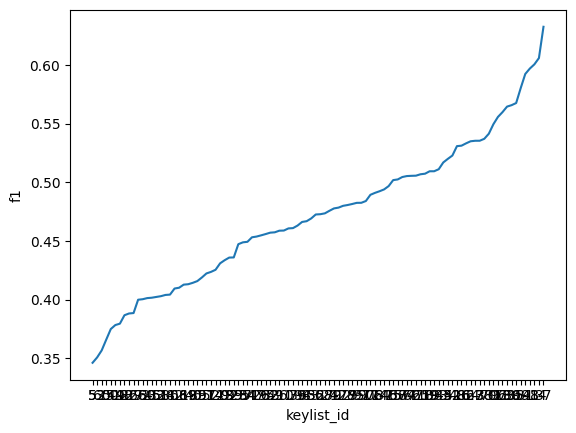

In [82]:
getLineplotKeylists(100)

In [83]:
#Same as above but ordered by f1 from worst to best
def getLineplotKeylistsSorted():
    start = 0
    increment = 0.05
    order = []
    for sniplen in SNIPPET_LENS:
        snip_df = param_df[(param_df['sniplen'] == sniplen)]
        if len(order) == 0:
            order = snip_df.groupby('keylist_id')[['keylist_id', 'f1']].agg(np.mean).to_numpy()
            print(order)
        ax = sns.lineplot(data=snip_df, x='keylist_id', y='f1', estimator='mean', errorbar=('ci', 99), n_boot=1000, sort=False)
        ax.set_ylim(0, 0.7)
        if sniplen == 5:
            start = ax.lines[-1].get_ydata()[-1]-increment
        ax.text(107, start+increment, sniplen, bbox=dict(facecolor=ax.lines[-1].get_color(), alpha=0.7))
        ax.set_ylabel("Macro f1")
        ax.set_xlabel("Split id")
        start += increment
    lbls = []
    for l in SNIPPET_LENS:
        lbls.append(str(l))
        lbls.append(str(l)+"_99%_ci")

[[ 0.          0.38053011]
 [ 1.          0.34902183]
 [ 2.          0.3515509 ]
 [ 3.          0.43654334]
 [ 4.          0.42768726]
 [ 5.          0.2998236 ]
 [ 6.          0.35033097]
 [ 7.          0.37569361]
 [ 8.          0.38946341]
 [ 9.          0.41585978]
 [10.          0.3355566 ]
 [11.          0.41030277]
 [12.          0.38654511]
 [13.          0.37741626]
 [14.          0.44180182]
 [15.          0.39357571]
 [16.          0.40945768]
 [17.          0.37927298]
 [18.          0.27691546]
 [19.          0.37174231]
 [20.          0.37757724]
 [21.          0.40568232]
 [22.          0.37066526]
 [23.          0.35910557]
 [24.          0.32446446]
 [25.          0.31474968]
 [26.          0.35703094]
 [27.          0.40105596]
 [28.          0.38966251]
 [29.          0.28197922]
 [30.          0.36028537]
 [31.          0.41739549]
 [32.          0.33983048]
 [33.          0.34966564]
 [34.          0.39858353]
 [35.          0.41201035]
 [36.          0.34709012]
 

/tmp/ipykernel_101534/2082431122.py:9: FutureWarning: The provided callable <function mean at 0x71bb9ef39240> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  order = snip_df.groupby('keylist_id')[['keylist_id', 'f1']].agg(np.mean).to_numpy()


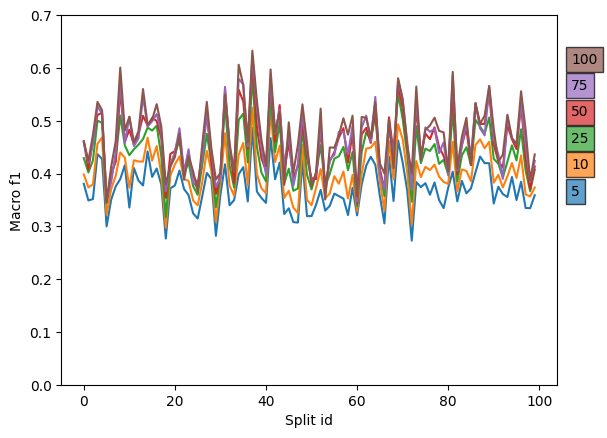

In [84]:
getLineplotKeylistsSorted()

In [85]:
keylist_diffs = []
maxss = []
minss = []
for i in SNIPPET_LENS:
    filtered = param_df[(param_df['sniplen'] == i)].sort_values('f1', ascending=False).drop_duplicates('keylist_id')[['f1']]
    mins = np.min(filtered.to_numpy())
    maxs = np.max(filtered.to_numpy())
    maxss.append(maxs)
    minss.append(mins)
    keylist_diffs.append(np.add(maxs, -mins))
print(keylist_diffs)
print(maxss)
print(minss)

[0.21348107465476063, 0.22766006574900133, 0.26765343379172174, 0.26874796169416065, 0.27561817735571553, 0.2865537503145649]
[0.48639145205722983, 0.5248533132053614, 0.5851782816926318, 0.612272351836808, 0.6222155219947425, 0.6327853940572998]
[0.2729103774024692, 0.2971932474563601, 0.31752484790091, 0.3435243901426473, 0.34659734463902697, 0.3462316437427349]


In [86]:
min_max_diff = []
for i in range(100):
    filtered = param_df[(param_df['keylist_id'] == i)][['sniplen','f1']]
    maxs = np.array([np.max(filtered[filtered['sniplen'] == x]['f1'].to_numpy()) for x in SNIPPET_LENS])
    mins = np.array([np.min(filtered[filtered['sniplen'] == x]['f1'].to_numpy()) for x in SNIPPET_LENS])

In [87]:
print(param_df.sort_values('f1', ascending=False).drop_duplicates(['keylist_id','sniplen']))

     keylist_id  sniplen         c        f1
227          37      100  0.718562  0.632785
226          37       75  0.079138  0.622216
225          37       50  0.979435  0.612272
209          34      100  0.956288  0.606092
53            8      100  0.946514  0.600744
..          ...      ...       ...       ...
30            5        5  0.886704  0.299824
109          18       10  0.973663  0.297193
174          29        5  0.978871  0.281979
108          18        5  0.704750  0.276915
432          72        5  0.813047  0.272910

[600 rows x 4 columns]


In [88]:
print(param_df[param_df.sniplen == 10].sort_values('f1', ascending=False).drop_duplicates(['keylist_id'])[:100])

     keylist_id  sniplen         c        f1
223          37       10  0.615291  0.524853
247          41       10  0.281026  0.518913
415          69       10  0.008169  0.493291
187          31       10  0.831272  0.476284
25            4       10  0.033715  0.468357
..          ...      ...       ...       ...
283          47       10  0.913169  0.325332
31            5       10  0.982240  0.321705
175          29       10  0.551327  0.308566
433          72       10  0.897833  0.303173
109          18       10  0.973663  0.297193

[100 rows x 4 columns]


In [89]:
print(param_df[param_df.sniplen == '25'].sort_values('f1', ascending=False).drop_duplicates(['keylist_id'])[:100])

Empty DataFrame
Columns: [keylist_id, sniplen, c, f1]
Index: []


In [106]:
print(param_df[param_df.sniplen == 50].sort_values('f1', ascending=False).drop_duplicates(['keylist_id'])[:100])

     keylist_id  sniplen         c        f1
225          37       50  0.979435  0.612272
249          41       50  0.059452  0.579639
417          69       50  0.029786  0.566929
51            8       50  0.909071  0.558923
189          31       50  0.602567  0.558747
..          ...      ...       ...       ...
591          98       50  0.601282  0.370509
177          29       50  0.881584  0.361471
111          18       50  0.617675  0.354029
33            5       50  0.962401  0.346302
363          60       50  0.728492  0.343524

[100 rows x 4 columns]


In [91]:
print(param_df[param_df.sniplen == '75'].sort_values('f1', ascending=False).drop_duplicates(['keylist_id'])[:100])

Empty DataFrame
Columns: [keylist_id, sniplen, c, f1]
Index: []


In [92]:
print(param_df[param_df.sniplen == 100].sort_values('f1', ascending=False).drop_duplicates(['keylist_id'])[:100]['c'].to_numpy())

[0.71856173 0.95628793 0.94651394 0.11302347 0.87147321 0.05792434
 0.91160461 0.6770551  0.48901761 0.94535587 0.97349685 0.54069107
 0.86316566 0.93748768 0.90537665 0.18707314 0.76923957 0.85600729
 0.92478528 0.89969493 0.78373354 0.98590502 0.9101071  0.03447708
 0.72822412 0.908715   0.06057801 0.9023302  0.90884385 0.8839544
 0.8279639  0.96210254 0.6284629  0.94444094 0.86079123 0.9798573
 0.08186048 0.99490057 0.88748177 0.90302662 0.65376709 0.82987112
 0.89143504 0.23671918 0.99085941 0.95297017 0.49184902 0.10080293
 0.93335301 0.77951609 0.96240784 0.76168648 0.64866644 0.04713554
 0.99128785 0.48949395 0.14554296 0.58485208 0.72030737 0.97084412
 0.91907959 0.16147428 0.70168389 0.75272512 0.95939618 0.92944153
 0.98743815 0.95486131 0.96312318 0.91932641 0.11589049 0.96681514
 0.85349123 0.89689322 0.925901   0.98311289 0.88658813 0.64098707
 0.14944166 0.71014207 0.35196852 0.97289956 0.20287865 0.83816814
 0.72700199 0.74002001 0.57783607 0.87646645 0.61260832 0.420763

In [93]:
print(df[(df.sniplen == 100) & (df.c==120)].sort_values('f1', ascending=False))

Empty DataFrame
Columns: [keylist_id, f1, labels, conf_matrix, c, tol, penalty, c_eval_scores, important_features_for_13+, important_features_for_7-8, important_features_for_9-12, sniplen]
Index: []


## Confusion matrix of best result

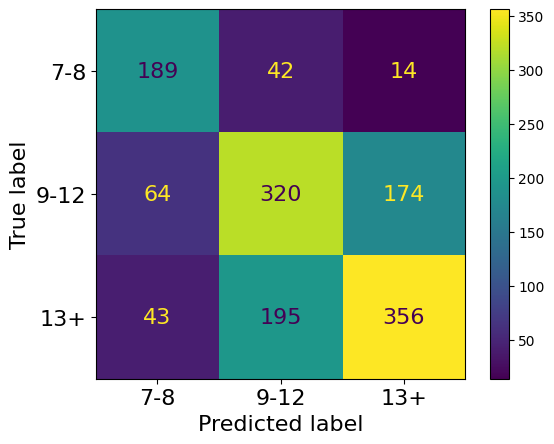

In [94]:
from sklearn import metrics

best_predicts = np.array(df[df['sniplen']==100].sort_values('f1', ascending=False)[:1]['conf_matrix'].to_numpy()[0])
best_labels = df.sort_values('f1', ascending=False)[:1]['labels'].to_numpy()[0]

def reOrderFromYoungToOld(predicts, labels):
    labels = ['7-8', '9-12', '13+']
    young = np.array([predicts[1][1], predicts[1][2], predicts[1][0]])
    mid = np.array([predicts[2][1], predicts[2][2], predicts[2][0]])
    old = np.array([predicts[0][1], predicts[0][2], predicts[0][0]])
    predicts = np.array([young, mid, old])
    return labels, predicts

r_lables, r_predicts = reOrderFromYoungToOld(best_predicts, best_labels)

label_font = {'size':'16'}
p = metrics.ConfusionMatrixDisplay(confusion_matrix=r_predicts, display_labels=r_lables)
p.plot(text_kw={'size':16})
plt.gca().axes.tick_params(axis='both', which='major', labelsize=16)
plt.gca().axes.set_xlabel("Predicted label", fontdict=label_font)
plt.gca().axes.set_ylabel("True label", fontdict=label_font)
plt.show()

## Insight into important featues if used HPFV

In [95]:
test_conllu_line = "1\tAikojen\taika\tNOUN\tN\tCase=Gen|Number=Plur\t2\tnsubj\t_\t_\n2\tkuluessa\tkulua\tVERB\tV\tCase=Ine|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t7\tadvcl\t_\t_\n3\tmuinaisina\tmuinainen\tADJ\tA\tCase=Ess|Degree=Pos|Derivation=Inen|Number=Plur\t4\tamod\t_\t_\n4\taikoina\taika\tNOUN\tN\tCase=Ess|Number=Plur\t5\tobl\t_\t_\n5\tsyntynyt\tsynty\u00e4\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t6\tacl\t_\t_\n6\tpahuus\tpahuus\tNOUN\tN\tCase=Nom|Derivation=Vs|Number=Sing\t7\tnsubj\t_\t_\n7\tkasvaa\tkasvaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t12\tpunct\t_\t_\n9\ti\u00e4inen\ti\u00e4inen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Sing\t10\tamod\t_\t_\n10\tpimeys\tpimeys\tNOUN\tN\tCase=Nom|Derivation=Vs|Number=Sing\t12\tnsubj:cop\t_\t_\n11\ton\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t12\tcop\t_\t_\n12\tvalloillaan\tvalloillaan\tADV\tAdv\t_\t7\tconj\t_\t_\n13\tja\tja\tCCONJ\tC\t_\t14\tcc\t_\t_\n14\tyritt\u00e4\u00e4\tyritt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t7\tconj\t_\t_\n15\tsy\u00f6st\u00e4\tsy\u00f6st\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t14\txcomp\t_\t_\n16\tkoko\tkoko\tADJ\tA\t_\t17\tamod\t_\t_\n17\tmaan\tmaa\tNOUN\tN\tCase=Gen|Number=Sing\t15\tobj\t_\t_\n18\tp\u00e4\u00e4ttym\u00e4tt\u00f6m\u00e4\u00e4n\tp\u00e4\u00e4ttym\u00e4t\u00f6n\tADJ\tA\tCase=Ill|Degree=Pos|Derivation=Ton|Number=Sing\t19\tamod\t_\t_\n19\ty\u00f6h\u00f6n\ty\u00f6\tNOUN\tN\tCase=Ill|Number=Sing\t15\tobl\t_\t_\n20\t.\t.\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n1\tT\u00e4t\u00e4\tt\u00e4m\u00e4\tPRON\tPron\tCase=Par|Number=Sing|PronType=Dem\t2\tdet\t_\t_\n2\tpahuutta\tpahuutta\tNOUN\tN\tCase=Par|Derivation=Vs|Number=Sing\t5\tobj\t_\t_\n3\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t5\taux\t_\t_\n4\tvoi\tvoida\tAUX\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t5\taux\t_\t_\n5\tly\u00f6d\u00e4\tly\u00f6d\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t0\troot\t_\t_\n6\tkukaan\tkukaan\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t5\tnsubj\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t18\tpunct\t_\t_\n8\tpaitsi\tpaitsi\tADP\tAdp\t_\t18\tcase\t_\t_\n9\tyksi\tyksi\tNUM\tNum\tCase=Nom|Number=Sing|NumType=Card\t18\tnummod\t_\t_\n10\tja\tja\tCCONJ\tC\t_\t11\tcc\t_\t_\n11\tainoa\tainoa\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t9\tconj\t_\t_\n12\tValveuden\tvalveus\tNOUN\tN\tCase=Gen|Derivation=Vs|Number=Sing\t13\tnsubj\t_\t_\n13\tvalitsema\tvalita\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Agt|VerbForm=Part|Voice=Act\t18\tacl\t_\t_\n14\t,\t,\tPUNCT\tPunct\t_\t18\tpunct\t_\t_\n15\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t17\tnsubj\t_\t_\n16\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t15\tflat:name\t_\t_\n17\ttuleva\ttulla\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t18\tacl\t_\t_\n18\tsankari\tsankari\tNOUN\tN\tCase=Nom|Number=Sing\t6\tappos\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\tVirheet\u00f6n\tvirheet\u00f6n\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Ton|Number=Sing\t2\tamod\t_\t_\n2\tmies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n4\tjoka\tjoka\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Rel\t5\tnsubj\t_\t_\n5\tkantaa\tkantaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tacl:relcl\t_\t_\n6\tvalon\tvalo\tNOUN\tN\tCase=Gen|Number=Sing\t7\tnmod:poss\t_\t_\n7\tamulettia\tamuletti\tNOUN\tN\tCase=Par|Number=Sing\t5\tobj\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t10\tcc\t_\t_\n9\tt\u00e4ydellisesti\tt\u00e4ydellisesti\tADV\tAdv\tDerivation=Sti\t10\tadvmod\t_\t_\n10\tt\u00e4ytt\u00e4\u00e4\tt\u00e4ytt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t5\tconj\t_\t_\n11\tValveuden\tvalveus\tNOUN\tN\tCase=Gen|Derivation=Vs|Number=Sing\t12\tnmod:poss\t_\t_\n12\ttahdon\ttahto\tNOUN\tN\tCase=Gen|Number=Sing\t10\tobj\t_\t_\n13\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tKun\tkun\tSCONJ\tC\t_\t4\tmark\t_\t_\n2\taika\taika\tNOUN\tN\tCase=Nom|Number=Sing\t4\tnsubj:cop\t_\t_\n3\ton\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tcop\t_\t_\n4\tt\u00e4ysi\tt\u00e4ysi\tADJ\tA\tCase=Nom|Degree=Pos|Number=Sing\t7\tadvcl\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n6\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t7\tnsubj\t_\t_\n7\tuhraa\tuhrata\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n8\titsens\u00e4\titse\tPRON\tPron\tCase=Gen|Number=Sing|Person[psor]=3|Reflex=Yes\t7\tobj\t_\t_\n9\tkaikkien\tkaikki\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Ind\t7\tobl\t_\t_\n10\tpuolesta\tpuolesta\tADP\tAdp\tAdpType=Post\t9\tcase\t_\t_\n11\ttaistelussa\ttaistelu\tNOUN\tN\tCase=Ine|Derivation=U|Number=Sing\t7\tobl\t_\t_\n12\tpimeytt\u00e4\tpimeys\tNOUN\tN\tCase=Par|Derivation=Vs|Number=Sing\t11\tnmod\t_\t_\n13\tvastaan\tvastaan\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\t,\t,\tPUNCT\tPunct\t_\t18\tpunct\t_\t_\n15\tmutta\tmutta\tCCONJ\tC\t_\t18\tcc\t_\t_\n16\tkuolemakaan\tkuolema\tNOUN\tN\tCase=Nom|Clitic=Kaan|Number=Sing\t18\tnsubj\t_\t_\n17\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t18\taux\t_\t_\n18\tsaa\tsaada\tVERB\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t7\tconj\t_\t_\n19\th\u00e4nest\u00e4\th\u00e4n\tPRON\tPron\tCase=Ela|Number=Sing|Person=3|PronType=Prs\t18\tobl\t_\t_\n20\tvoittoa\tvoitto\tNOUN\tN\tCase=Par|Number=Sing\t18\tobj\t_\t_\n21\t.\t.\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n1\tValittu\tvalita\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Pass\t2\tnsubj\t_\t_\n2\tvoittaa\tvoittaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tlopullisesti\tlopullisesti\tADV\tAdv\tDerivation=Sti\t2\tadvmod\t_\t_\n4\t\t\tPROPN\tN\tCase=Gen|Number=Sing\t2\tobj\t_\t_\n5\tjoukkoineen\tjoukko\tNOUN\tN\tCase=Com|Person[psor]=3\t4\tnmod\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n8\tmaailmaan\tmaailma\tNOUN\tN\tCase=Ill|Number=Sing\t9\tobl\t_\t_\n9\tpalaa\tpalata\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\thyvyys\thyvyys\tNOUN\tN\tCase=Nom|Number=Sing\t9\tnsubj\t_\t_\n11\tja\tja\tCCONJ\tC\t_\t12\tcc\t_\t_\n12\trauha\trauha\tNOUN\tN\tCase=Nom|Number=Sing\t10\tconj\t_\t_\n13\tkuin\tkuin\tSCONJ\tC\t_\t15\tmark\t_\t_\n14\tentisin\u00e4\tentinen\tADJ\tA\tCase=Ess|Degree=Pos|Derivation=Inen|Number=Plur\t15\tamod\t_\t_\n15\taikoina\taika\tNOUN\tN\tCase=Ess|Number=Plur\t9\tadvcl\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tJa\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n2\tkaikki\tkaikki\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t9\tnsubj\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n4\tjotka\tjoka\tPRON\tPron\tCase=Nom|Number=Plur|PronType=Rel\t7\tnsubj\t_\t_\n5\tovat\tolla\tAUX\tV\tMood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t7\taux\t_\t_\n6\tvalittua\tvalittu\tNOUN\tN\tCase=Par|Number=Sing\t7\tobj\t_\t_\n7\tseuranneet\tseurata\tVERB\tV\tCase=Nom|Degree=Pos|Number=Plur|PartForm=Past|VerbForm=Part|Voice=Act\t2\tacl:relcl\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n9\tp\u00e4\u00e4sev\u00e4t\tp\u00e4\u00e4st\u00e4\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n10\th\u00e4nen\th\u00e4n\tPRON\tPron\tCase=Gen|Number=Sing|Person=3|PronType=Prs\t9\tobl\t_\t_\n11\tkanssaan\tkanssa\tADP\tAdp\tAdpType=Post|Person[psor]=3\t10\tcase\t_\t_\n12\tValveuden\tvalveus\tNOUN\tN\tCase=Gen|Derivation=Vs|Number=Sing\t9\tobl\t_\t_\n13\tluo\tluo\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\tikuiseen\tikuinen\tADJ\tA\tCase=Ill|Degree=Pos|Derivation=Inen|Number=Sing\t15\tamod\t_\t_\n15\tiloon\tilo\tNOUN\tN\tCase=Ill|Number=Sing\t9\tobl\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tJoten\tjoten\tADV\tAdv\t_\t3\tadvmod\t_\t_\n3\tryhdy\tryhty\u00e4\tVERB\tV\tMood=Imp|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\tsin\u00e4kin\tsin\u00e4\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Sing|Person=2|PronType=Prs\t3\tnsubj\t_\t_\n5\tvalittu-ehdokkaaksi\tvalittu#ehdokas\tNOUN\tN\tCase=Tra|Number=Sing\t3\txcomp:ds\t_\t_\n6\t!\t!\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tJos\tjos\tSCONJ\tC\t_\t3\tmark\t_\t_\n2\tet\tei\tAUX\tV\tNumber=Sing|Person=2|Polarity=Neg|VerbForm=Fin|Voice=Act\t3\taux\t_\t_\n3\tkuole\tkuolla\tVERB\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t9\tadvcl\t_\t_\n4\theti\theti\tADV\tAdv\t_\t6\tadvmod\t_\t_\n5\tensimm\u00e4isess\u00e4\tensimm\u00e4inen\tADJ\tNum\tCase=Ine|Derivation=Inen|Number=Sing|NumType=Ord\t6\tamod\t_\t_\n6\ttaistelussa\ttaistelu\tNOUN\tN\tCase=Ine|Derivation=U|Number=Sing\t3\tobl\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n8\tsaatat\tsaattaa\tAUX\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t9\taux\t_\t_\n9\tvoittaa\tvoittaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t0\troot\t_\t_\n10\tikuisen\tikuinen\tADJ\tA\tCase=Gen|Degree=Pos|Derivation=Inen|Number=Sing\t11\tamod\t_\t_\n11\tel\u00e4m\u00e4n\tel\u00e4m\u00e4\tNOUN\tN\tCase=Gen|Number=Sing\t9\tobj\t_\t_\n12\t!\t!\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n13\t\"\t\"\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n2\tEnt\u00e4\tent\u00e4\tADV\tAdv\t_\t5\tadvmod\t_\t_\n3\tjos\tjos\tSCONJ\tC\t_\t5\tmark\t_\t_\n4\ten\tei\tAUX\tV\tNumber=Sing|Person=1|Polarity=Neg|VerbForm=Fin|Voice=Act\t5\taux\t_\t_\n5\thalua\thaluta\tVERB\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t0\troot\t_\t_\n6\t?\t?\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n7\t\"\t\"\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n8\tmin\u00e4\tmin\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|Person=1|PronType=Prs\t9\tnsubj\t_\t_\n9\tkysyin\tkysy\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin|Voice=Act\t5\tparataxis\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\t\u00c4l\u00e4\tei\tAUX\tV\tMood=Imp|Number=Sing|Person=2|Polarity=Neg|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n3\tole\tolla\tAUX\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t4\tcop\t_\t_\n4\tpelkuri\tpelkuri\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n5\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n6\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n7\tjyr\u00e4htiv\u00e4t\tjyr\u00e4ht\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t4\tparataxis\t_\t_\n8\thyvikset\thyvi\tADJ\tA\tCase=Nom|Number=Plur\t7\tnsubj\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\tOnko\tolla\tAUX\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tcop\t_\t_\n3\tmeiss\u00e4\tmin\u00e4\tPRON\tPron\tCase=Ine|Number=Plur|PronType=Dem\t4\tobl\t_\t_\n4\tkeness\u00e4k\u00e4\u00e4n\tkukaan\tPRON\tPron\tCase=Ine|Number=Sing|PronType=Ind\t0\troot\t_\t_\n5\tmit\u00e4\u00e4n\tmik\u00e4\u00e4n\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t4\tnsubj:cop\t_\t_\n6\tpelastamisen\tpelastaminen\tNOUN\tN\tCase=Gen|Derivation=Minen|Number=Sing\t7\tnmod:poss\t_\t_\n7\tarvoista\tarvoinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Inen|Number=Sing\t5\tnmod\t_\t_\n8\t?\t?\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tSiet\u00e4isimme\tsiet\u00e4\u00e4\tVERB\tV\tMood=Cnd|Number=Plur|Person=1|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\tkaikki\tkaikki\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t1\tobj\t_\t_\n3\tkuolla\tkuolla\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t1\txcomp\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\tmutisi\tmutista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t1\tparataxis\t_\t_\n7\tViikatemies\tviikate#mies\tNOUN\tN\tCase=Nom|Number=Sing\t6\tnsubj\t_\t_\n8\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tParas\thyv\u00e4\tADJ\tA\tCase=Nom|Degree=Sup|Number=Sing\t0\troot\t_\t_\n3\titse\titse\tADV\tAdv\t_\t5\tadvmod\t_\t_\n4\titsens\u00e4\titse\tPRON\tPron\tCase=Gen|Number=Sing|Person[psor]=3|Reflex=Yes\t5\tobj\t_\t_\n5\tpelastaa\tpelastaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t2\txcomp:ds\t_\t_\n6\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n8\ttokaisi\ttokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n9\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t8\tnsubj\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tTe\tsin\u00e4\tPRON\tPron\tCase=Nom|Number=Plur|Person=2|PronType=Prs\t3\tnsubj:cop\t_\t_\n3\tharhaoppiset\tharhaoppinen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Plur\t0\troot\t_\t_\n4\t!\t!\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tHirteen\thirre\tNOUN\tN\tCase=Ill|Number=Sing\t2\tobl\t_\t_\n2\tjoudatte\tjoudattaa\tVERB\tV\tMood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\t!\t!\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n5\tpauhasivat\tpauhata\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n6\thyvikset\thyvi\tADJ\tA\tCase=Nom|Number=Plur\t5\tnsubj\t_\t_\n7\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMin\u00e4\tmin\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|Person=1|PronType=Prs\t3\tnsubj\t_\t_\n2\ten\tei\tAUX\tV\tNumber=Sing|Person=1|Polarity=Neg|VerbForm=Fin|Voice=Act\t3\taux\t_\t_\n3\tuskaltanut\tuskaltaa\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t0\troot\t_\t_\n4\tmainitakaan\tmainita\tVERB\tV\tClitic=Kaan|InfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t3\txcomp\t_\t_\n5\tmuista\tmuu\tPRON\tPron\tCase=Ela|Number=Plur|PronType=Ind\t6\tdet\t_\t_\n6\tmahdollisuuksista\tmahdollisuus\tNOUN\tN\tCase=Ela|Derivation=Llinen,Vs|Number=Plur\t4\tobl\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n8\tniin\tniin\tADV\tAdv\t_\t9\tadvmod\t_\t_\n9\tlopetin\tlopettaa\tVERB\tV\tMood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin|Voice=Act\t3\tconj\t_\t_\n10\tt\u00e4m\u00e4n\tt\u00e4m\u00e4\tPRON\tPron\tCase=Gen|Number=Sing|PronType=Dem\t11\tdet\t_\t_\n11\tpaperin\tpaperi\tNOUN\tN\tCase=Gen|Number=Sing\t12\tnmod:gobj\t_\t_\n12\ttuhlaamisen\ttuhlaaminen\tNOUN\tN\tCase=Gen|Derivation=Minen|Number=Sing\t9\tobj\t_\t_\n13\t,\t,\tPUNCT\tPunct\t_\t16\tpunct\t_\t_\n14\tkoska\tkoska\tSCONJ\tC\t_\t16\tmark\t_\t_\n15\ttila\ttila\tNOUN\tN\tCase=Nom|Number=Sing\t16\tnsubj\t_\t_\n16\tloppuu\tloppua\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t9\tadvcl\t_\t_\n17\tja\tja\tCCONJ\tC\t_\t21\tcc\t_\t_\n18\tminun\tmin\u00e4\tPRON\tPron\tCase=Gen|Number=Sing|Person=1|PronType=Prs\t21\tnsubj\t_\t_\n19\tpit\u00e4isi\tpit\u00e4\u00e4\tAUX\tV\tMood=Cnd|Number=Sing|Person=3|VerbForm=Fin|Voice=Act\t21\taux\t_\t_\n20\tolla\tolla\tAUX\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t21\taux\t_\t_\n21\ttekem\u00e4ss\u00e4\ttehd\u00e4\tVERB\tV\tCase=Ine|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t16\tconj\t_\t_\n22\tjotain\tjokin\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t24\tdet\t_\t_\n23\toikeasti\toikeasti\tADV\tAdv\tDerivation=Sti\t24\tadvmod\t_\t_\n24\thy\u00f6dyllist\u00e4\thy\u00f6dyllinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Llinen|Number=Sing\t21\tobj\t_\t_\n25\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\thuokaisi\thuokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tsyv\u00e4\u00e4n\tsyv\u00e4\u00e4n\tADV\tAdv\t_\t2\tadvmod\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n5\tlaski\tlaskea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\tkyn\u00e4n\tkyn\u00e4\tNOUN\tN\tCase=Gen|Number=Sing\t5\tobj\t_\t_\n7\tmustepulloon\tmuste#pullo\tNOUN\tN\tCase=Ill|Number=Sing\t5\tobl\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\tj\u00e4i\tj\u00e4\u00e4d\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\tkatsomaan\tkatsoa\tVERB\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t9\txcomp\t_\t_\n11\thorisonttiin\thorisontti\tNOUN\tN\tCase=Ill|Number=Sing\t10\tobl\t_\t_\n12\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tPahuksen\tpahus\tNOUN\tN\tCase=Gen|Number=Sing\t3\tnmod:poss\t_\t_\n3\tprofetia\tprofetia\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n4\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n5\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tLinnan\tlinna\tNOUN\tN\tCase=Gen|Number=Sing\t2\tnmod:poss\t_\t_\n2\tkorkeimmasta\tkorkea\tADJ\tA\tCase=Ela|Degree=Sup|Number=Sing\t3\tamod\t_\t_\n3\ttornista\ttorni\tNOUN\tN\tCase=Ela|Number=Sing\t4\tobl\t_\t_\n4\tn\u00e4ki\tn\u00e4hd\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=0|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n5\tymp\u00e4r\u00f6iv\u00e4n\tymp\u00e4r\u00f6id\u00e4\tVERB\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t6\tacl\t_\t_\n6\tkaupungin\tkaupunki\tNOUN\tN\tCase=Gen|Number=Sing\t11\tnmod\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t8\tcc\t_\t_\n8\tpeltomaiden\tpelto#maa\tNOUN\tN\tCase=Gen|Number=Plur\t6\tconj\t_\t_\n9\tyli\tyli\tADP\tAdp\tAdpType=Post\t6\tcase\t_\t_\n10\tautioon\tautio\tADJ\tA\tCase=Ill|Degree=Pos|Number=Sing\t11\tamod\t_\t_\n11\treunaseutuun\treuna#seutu\tNOUN\tN\tCase=Ill|Number=Sing\t4\tobl\t_\t_\n12\t,\t,\tPUNCT\tPunct\t_\t15\tpunct\t_\t_\n13\tjoka\tjoka\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Rel\t15\tnsubj\t_\t_\n14\tv\u00e4hitellen\tv\u00e4hitellen\tADV\tAdv\t_\t15\tadvmod\t_\t_\n15\tnousi\tnousta\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t11\tacl:relcl\t_\t_\n16\tsynkkyytt\u00e4\tsynkkyys\tNOUN\tN\tCase=Par|Number=Sing\t17\tobj\t_\t_\n17\thuokuvaksi\thuokua\tVERB\tV\tCase=Tra|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t18\tacl\t_\t_\n18\tvuoristoksi\tvuoristo\tNOUN\tN\tCase=Tra|Number=Sing\t15\txcomp\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tsiirtyi\tsiirty\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tvieress\u00e4\u00e4n\tvieress\u00e4\tADV\tAdv\tPerson[psor]=3\t4\tadvmod\t_\t_\n4\tolevan\tolla\tVERB\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t6\tacl\t_\t_\n5\tjyhke\u00e4n\tjyhke\u00e4\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t6\tamod\t_\t_\n6\tkaukoputken\tkauko#putki\tNOUN\tN\tCase=Gen|Number=Sing\t2\tobl\t_\t_\n7\t\u00e4\u00e4relle\t\u00e4\u00e4ri\tADP\tAdp\tAdpType=Post\t6\tcase\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\tkatsoi\tkatsoa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\tsill\u00e4\tse\tPRON\tPron\tCase=Ade|Number=Sing|PronType=Dem\t9\tobl\t_\t_\n11\ttaas\ttaas\tADV\tAdv\t_\t9\tadvmod\t_\t_\n12\tvuorten\tvuori\tNOUN\tN\tCase=Gen|Number=Plur\t14\tobl\t_\t_\n13\tv\u00e4liin\tv\u00e4liin\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\tj\u00e4\u00e4v\u00e4\u00e4n\tj\u00e4\u00e4d\u00e4\tVERB\tV\tCase=Ill|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t15\tacl\t_\t_\n15\tsolaan\tsola\tNOUN\tN\tCase=Ill|Number=Sing\t9\tobl\t_\t_\n16\t,\t,\tPUNCT\tPunct\t_\t18\tpunct\t_\t_\n17\tmiss\u00e4\tmik\u00e4\tPRON\tPron\tCase=Ine|Number=Sing|PronType=Rel\t18\tobl\t_\t_\n18\tkulki\tkulkea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t15\tacl:relcl\t_\t_\n19\tvaltakunnat\tvalta#kunta\tNOUN\tN\tCase=Nom|Number=Plur\t20\tobj\t_\t_\n20\tyhdist\u00e4v\u00e4\tyhdist\u00e4\u00e4\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t21\tacl\t_\t_\n21\tvaltatie\tvalta#tie\tNOUN\tN\tCase=Nom|Number=Sing\t18\tnsubj\t_\t_\n22\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tTaistelu\ttaistelu\tNOUN\tN\tCase=Nom|Derivation=U|Number=Sing\t6\tnsubj:cop\t_\t_\n2\tsiell\u00e4\tsiell\u00e4\tADV\tAdv\t_\t1\tadvmod\t_\t_\n3\toli\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t6\tcop\t_\t_\n4\tedelleen\tedelleen\tADV\tAdv\t_\t6\tadvmod\t_\t_\n5\tt\u00e4ydess\u00e4\tt\u00e4ysi\tADJ\tA\tCase=Ine|Degree=Pos|Number=Sing\t6\tamod\t_\t_\n6\tvauhdissa\tvauhti\tNOUN\tN\tCase=Ine|Number=Sing\t0\troot\t_\t_\n7\t.\t.\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n2\tOn\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t6\tcop\t_\t_\n3\ttuokin\ttuokin\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Sing|PronType=Dem\t6\tnsubj:cop\t_\t_\n4\ttaas\ttaas\tADV\tAdv\t_\t6\tadvmod\t_\t_\n5\tj\u00e4rkev\u00e4\tj\u00e4rkev\u00e4\tADJ\tA\tCase=Nom|Degree=Pos|Number=Sing\t6\tamod\t_\t_\n6\ttapa\ttapa\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n7\tkuluttaa\tkuluttaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t6\tacl\t_\t_\n8\taikaa\taika\tNOUN\tN\tCase=Par|Number=Sing\t7\tobj\t_\t_\n9\tja\tja\tCCONJ\tC\t_\t10\tcc\t_\t_\n10\tresursseja\tresurssi\tNOUN\tN\tCase=Par|Number=Plur\t8\tconj\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n1\tLuulisi\tluulla\tVERB\tV\tMood=Cnd|Number=Sing|Person=0|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\t,\t,\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n3\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t8\tmark\t_\t_\n4\tnelj\u00e4ss\u00e4\tnelj\u00e4\tNUM\tNum\tCase=Ine|Number=Sing|NumType=Card\t5\tcompound\t_\t_\n5\tsadassa\tsata\tNUM\tNum\tCase=Ine|Number=Sing|NumType=Card\t6\tnummod\t_\t_\n6\tvuodessa\tvuosi\tNOUN\tN\tCase=Ine|Number=Sing\t8\tobl\t_\t_\n7\tihminen\tihminen\tNOUN\tN\tCase=Nom|Number=Sing\t8\tnsubj\t_\t_\n8\tkeksisi\tkeksi\u00e4\tVERB\tV\tMood=Cnd|Number=Sing|Person=3|VerbForm=Fin|Voice=Act\t1\tccomp\t_\t_\n9\tj\u00e4rkev\u00e4\u00e4kin\tj\u00e4rkev\u00e4\tADJ\tA\tCase=Nom|Clitic=Kin|Degree=Pos|Number=Sing\t10\tamod\t_\t_\n10\ttekemist\u00e4\ttekeminen\tNOUN\tN\tCase=Par|Derivation=Minen|Number=Sing\t8\tobj\t_\t_\n11\t,\t,\tPUNCT\tPunct\t_\t17\tpunct\t_\t_\n12\tmutta\tmutta\tCCONJ\tC\t_\t17\tcc\t_\t_\n13\tei\tei\tVERB\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t17\taux\t_\t_\n14\tn\u00e4ht\u00e4v\u00e4sti\tn\u00e4hd\u00e4\tVERB\tV\tDerivation=Sti\t17\tadvmod\t_\t_\n15\t,\t,\tPUNCT\tPunct\t_\t14\tpunct\t_\t_\n16\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t17\tnsubj\t_\t_\n17\tk\u00e4\u00e4nsi\tk\u00e4\u00e4nt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t1\tconj\t_\t_\n18\tkaukoputkea\tkauko#putki\tNOUN\tN\tCase=Par|Number=Sing\t17\tobj\t_\t_\n19\thitusen\thitusen\tADV\tAdv\t_\t17\tadvmod\t_\t_\n20\t,\t,\tPUNCT\tPunct\t_\t23\tpunct\t_\t_\n21\tjotta\tjotta\tSCONJ\tC\t_\t23\tmark\t_\t_\n22\tn\u00e4kyviin\tn\u00e4ky\u00e4\tVERB\tV\tCase=Ill|Degree=Pos|Number=Plur|PartForm=Pres|VerbForm=Part|Voice=Act\t23\txcomp\t_\t_\n23\ttuli\ttulla\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t17\tadvcl\t_\t_\n24\tvuorenrinteell\u00e4\tvuoren#rinne\tNOUN\tN\tCase=Ade|Number=Sing\t25\tobl\t_\t_\n25\tseisoskeleva\tseisoskella\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t26\tacl\t_\t_\n26\thahmo\thahmo\tNOUN\tN\tCase=Nom|Number=Sing\t23\tnsubj\t_\t_\n27\tmustassa\tmusta\tADJ\tA\tCase=Ine|Degree=Pos|Number=Sing\t28\tamod\t_\t_\n28\thaarniskassa\thaarniska\tNOUN\tN\tCase=Ine|Number=Sing\t26\tnmod\t_\t_\n29\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tPatsastelet\tpatsastella\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tsiell\u00e4\tsiell\u00e4\tADV\tAdv\t_\t2\tadvmod\t_\t_\n4\tja\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n5\tlatelet\tladella\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\tmahtipontisia\tmahtipontinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Inen|Number=Plur\t7\tamod\t_\t_\n7\tsolvauksia\tsolvaus\tNOUN\tN\tCase=Par|Number=Plur\t5\tobj\t_\t_\n8\tep\u00e4k\u00e4yt\u00e4nn\u00f6llisten\tep\u00e4#k\u00e4yt\u00e4nn\u00f6llinen\tADJ\tA\tCase=Gen|Degree=Pos|Derivation=Llinen|Number=Plur\t9\tamod\t_\t_\n9\tpiikkikoristeidesi\tpiikki#koriste\tNOUN\tN\tCase=Gen|Number=Plur|Number[psor]=Sing|Person[psor]=1\t5\tobl\t_\t_\n10\tkanssa\tkanssa\tADP\tAdp\tAdpType=Post\t9\tcase\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMuuttuisit\tmuuttua\tVERB\tV\tMood=Cnd|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\tjo\tjo\tADV\tAdv\t_\t1\tadvmod\t_\t_\n3\tlohik\u00e4\u00e4rmeeksi\tlohi#k\u00e4\u00e4rme\tNOUN\tN\tCase=Tra|Number=Sing\t1\txcomp\t_\t_\n4\tja\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n5\ttyhjent\u00e4isit\ttyhjent\u00e4\u00e4\tVERB\tV\tMood=Cnd|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t1\tconj\t_\t_\n6\tkoko\tkoko\tADJ\tA\t_\t7\tamod\t_\t_\n7\ttantereen\ttantere\tNOUN\tN\tCase=Gen|Number=Sing\t5\tobj\t_\t_\n8\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\tTai\ttai\tCCONJ\tC\t_\t2\tcc\t_\t_\n2\taivopesisit\taivopesita\tVERB\tV\tMood=Cnd|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tvastustajat\tvastustaja\tNOUN\tN\tCase=Nom|Derivation=Ja|Number=Plur\t2\tobj\t_\t_\n4\ttai\ttai\tCCONJ\tC\t_\t5\tcc\t_\t_\n5\ttekisit\ttehd\u00e4\tVERB\tV\tMood=Cnd|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\tjotain\tjokin\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t5\tobj\t_\t_\n7\tkaikilla\tkaikki\tPRON\tPron\tCase=Ade|Number=Plur|PronType=Ind\t8\tdet\t_\t_\n8\tylivoimillasi\tyli#voima\tADJ\tA\tCase=Ade|Number=Plur|Number[psor]=Sing|Person[psor]=2\t5\tobl\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMutta\tmutta\tCCONJ\tC\t_\t2\tcc\t_\t_\n2\tleikki\u00e4h\u00e4n\tleikki\tNOUN\tN\tCase=Nom|Clitic=Han|Number=Sing\t0\troot\t_\t_\n3\tt\u00e4m\u00e4\tt\u00e4m\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Dem\t2\tnsubj:cop\t_\t_\n4\tkaikki\tkaikki\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t2\tdet\t_\t_\n5\tsinulle\tsin\u00e4\tPRON\tPron\tCase=All|Number=Sing|Person=2|PronType=Prs\t2\tobl\t_\t_\n6\tvain\tvain\tADV\tAdv\t_\t5\tadvmod\t_\t_\n7\ton\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tcop\t_\t_\n8\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tToisten\ttoinen\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Rcp\t2\tnmod:gsubj\t_\t_\n2\tkustannuksella\tkustannus\tNOUN\tN\tCase=Ade|Number=Sing\t0\troot\t_\t_\n3\t...\t...\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tk\u00e4\u00e4nsi\tk\u00e4\u00e4nt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\ttaas\ttaas\tADV\tAdv\t_\t2\tadvmod\t_\t_\n4\tkaukoputkea\tkauko#putki\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n5\tja\tja\tCCONJ\tC\t_\t6\tcc\t_\t_\n6\tbongasi\tbongata\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n7\tteinipojan\tteini#poika\tNOUN\tN\tCase=Gen|Number=Sing\t8\tnsubj\t_\t_\n8\tniitt\u00e4m\u00e4ss\u00e4\tniitt\u00e4\u00e4\tVERB\tV\tCase=Ine|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t6\txcomp:ds\t_\t_\n9\tluurankosotilaita\tluuran#koso#tilaita\tNOUN\tN\tCase=Par|Number=Plur\t8\tobj\t_\t_\n10\tleimuavalla\tleimuta\tVERB\tV\tCase=All|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t11\tacl\t_\t_\n11\tmiekalla\tmiekka\tNOUN\tN\tCase=Ade|Number=Sing\t8\tobl\t_\t_\n12\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t0\tpunct\t_\t_\n1\tJa\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n2\tsin\u00e4\tsin\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|Person=2|PronType=Prs\t5\tnsubj\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n4\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t5\tnsubj\t_\t_\n5\tosoitteli\tosoitella\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\tsyytt\u00e4v\u00e4sti\tsyytt\u00e4v\u00e4sti\tADV\tAdv\tDerivation=Sti\t5\tadvmod\t_\t_\n7\tilmaa\tilma\tNOUN\tN\tCase=Par|Number=Sing\t5\tobj\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n9\t\"\t\"\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n10\ttyhj\u00e4np\u00e4iv\u00e4inen\ttyhj\u00e4n#p\u00e4iv\u00e4inen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Sing\t11\tamod\t_\t_\n11\tkynttil\u00e4nvalaja\tkynttil\u00e4n#valaja\tNOUN\tN\tCase=Nom|Number=Sing\t2\tappos\t_\t_\n12\t,\t,\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n13\tluulet\tluulla\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n14\tolevasi\tolla\tAUX\tV\tCase=Gen|Degree=Pos|Number=Sing|Number[psor]=Sing|PartForm=Pres|Person[psor]=2|VerbForm=Part|Voice=Act\t16\tcop\t_\t_\n15\toikeasti\toikeasti\tADV\tAdv\tDerivation=Sti\t16\tadvmod\t_\t_\n16\tmerkityksellinen\tmerkityksellinen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Llinen|Number=Sing\t13\txcomp\t_\t_\n17\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\tMik\u00e4\tmik\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Int\t3\tnsubj\t_\t_\n2\tmuka\tmuka\tADV\tAdv\t_\t3\tadvmod\t_\t_\n3\ttekee\ttehd\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\tsinusta\tsin\u00e4\tPRON\tPron\tCase=Ela|Number=Sing|Person=2|PronType=Prs\t3\tobl\t_\t_\n5\tenemm\u00e4n\tenemm\u00e4n\tADV\tAdv\t_\t6\tadvmod\t_\t_\n6\tvalitun\tvalita\tVERB\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Pass\t3\tobj\t_\t_\n7\tkuin\tkuin\tSCONJ\tC\t_\t9\tmark\t_\t_\n8\tjoku\tjoku\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t9\tdet\t_\t_\n9\ttoinen\ttoinen\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Rcp\t5\tadvcl\t_\t_\n10\t,\t,\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n11\th\u00e4h\th\u00e4h\tINTJ\tInterj\t_\t3\tdiscourse\t_\t_\n12\t?\t?\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tJoku\tjoku\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t3\tnsubj\t_\t_\n2\tvain\tvain\tADV\tAdv\t_\t3\tadvmod\t_\t_\n3\tp\u00e4\u00e4tti\tp\u00e4\u00e4tt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n5\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t9\tmark\t_\t_\n6\tsin\u00e4\tsin\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|Person=2|PronType=Prs\t9\tnsubj:cop\t_\t_\n7\tnyt\tnyt\tADV\tAdv\t_\t9\tadvmod\t_\t_\n8\tolet\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t9\tcop\t_\t_\n9\tt\u00e4rkein\tt\u00e4rke\u00e4\tADJ\tA\tCase=Nom|Degree=Sup|Number=Sing\t3\tccomp\t_\t_\n10\tkaikista\tkaikki\tPRON\tPron\tCase=Ela|Number=Plur|PronType=Ind\t9\tnmod\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tOlet\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t5\tcop\t_\t_\n2\tihan\tihan\tADV\tAdv\t_\t5\tadvmod\t_\t_\n3\tyht\u00e4\tyht\u00e4\tADV\tAdv\t_\t5\tadvmod\t_\t_\n4\tlailla\tlailla\tADV\tAdv\t_\t5\tadvmod\t_\t_\n5\tmurhaaja\tmurhaaja\tNOUN\tN\tCase=Nom|Derivation=Ja|Number=Sing\t0\troot\t_\t_\n6\tja\tja\tCCONJ\tC\t_\t7\tcc\t_\t_\n7\ttuhoaja\ttuhoaja\tNOUN\tN\tCase=Nom|Derivation=Ja|Number=Sing\t5\tconj\t_\t_\n8\tkuin\tkuin\tSCONJ\tC\t_\t9\tmark\t_\t_\n9\tmuutkin\tmuu\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Plur|PronType=Ind\t5\tadvcl\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\tTuhlaat\ttuhlata\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\tel\u00e4m\u00e4\u00e4si\tel\u00e4m\u00e4\tNOUN\tN\tCase=Par|Number=Sing|Number[psor]=Sing|Person[psor]=2\t1\tobj\t_\t_\n3\tjatkuvasti\tjatkuvasti\tADV\tAdv\tDerivation=Sti\t1\tadvmod\t_\t_\n4\ttapellen\ttapella\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t1\tadvcl\t_\t_\n5\tsiihen\tse\tPRON\tPron\tCase=Ill|Number=Sing|PronType=Dem\t4\tobl\t_\t_\n6\tasti\tasti\tADP\tAdp\tAdpType=Post\t5\tcase\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n8\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t10\tmark\t_\t_\n9\tPimeydenvaltias\tpimeyden#valtias\tNOUN\tN\tCase=Nom|Number=Sing\t10\tnsubj\t_\t_\n10\thaluaa\thaluta\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t5\tccomp\t_\t_\n11\tvaihtaa\tvaihtaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t10\txcomp\t_\t_\n12\tvalittua\tvalittua\tVERB\tV\tCase=Par|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Pass\t11\tobj\t_\t_\n13\tja\tja\tCCONJ\tC\t_\t14\tcc\t_\t_\n14\tpist\u00e4\u00e4\tpist\u00e4\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t11\tconj\t_\t_\n15\tsinut\tsin\u00e4\tPRON\tPron\tCase=Acc|Number=Sing|Person=2|PronType=Prs\t14\tobj\t_\t_\n16\tpois\tpois\tADV\tAdv\t_\t14\tadvmod\t_\t_\n17\tp\u00e4ivilt\u00e4\tp\u00e4iv\u00e4\tNOUN\tN\tCase=Abl|Number=Plur\t16\tnmod\t_\t_\n18\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n19\t\"\t\"\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\tTornin\ttorni\tNOUN\tN\tCase=Gen|Number=Sing\t2\tnmod:poss\t_\t_\n2\tkattoparrujen\tkatto#parru\tNOUN\tN\tCase=Gen|Number=Plur\t4\tobl\t_\t_\n3\tv\u00e4list\u00e4\tv\u00e4list\u00e4\tADP\tAdp\tAdpType=Post\t2\tcase\t_\t_\n4\tkuului\tkuulua\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n5\trahinaa\trahina\tNOUN\tN\tCase=Par|Number=Sing\t4\tnsubj\t_\t_\n6\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n7\tmiehen\tmies\tNOUN\tN\tCase=Gen|Number=Sing\t8\tnmod:poss\t_\t_\n8\thuomio\thuomio\tNOUN\tN\tCase=Nom|Number=Sing\t9\tnsubj\t_\t_\n9\tkiinnittyi\tkiinnitty\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t4\tconj\t_\t_\n10\t\u00e4\u00e4neen\t\u00e4\u00e4neen\tADV\tAdv\t_\t9\tadvmod\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tPikkuinen\tpikkuinen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Sing\t4\tamod\t_\t_\n2\t,\t,\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n3\tvaaleanvioletti\tvaalean#violetti\tADJ\tA\tCase=Nom|Degree=Pos|Number=Sing\t4\tamod\t_\t_\n4\tlirpakko\tlirpakko\tNOUN\tN\tCase=Nom|Number=Sing\t5\tnsubj\t_\t_\n5\ther\u00e4si\ther\u00e4t\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\taamu-uniltaan\taamu#unillas\tNOUN\tN\tCase=Ill|Number=Sing\t5\tobl\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t8\tcc\t_\t_\n8\tverrytteli\tverrytell\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t5\tconj\t_\t_\n9\tnahkaisia\tnahkainen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Inen|Number=Plur\t10\tamod\t_\t_\n10\tsiipi\u00e4\u00e4n\tsiipi\tNOUN\tN\tCase=Par|Number=Plur|Person[psor]=3\t8\tobj\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tkatsoi\tkatsoa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tel\u00e4int\u00e4\tel\u00e4in\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n4\tniin\tniin\tADV\tAdv\t_\t5\tadvmod\t_\t_\n5\tkauan\tkauan\tADV\tAdv\t_\t2\tadvmod\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n7\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t9\tmark\t_\t_\n8\tsekin\tse\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Sing|PronType=Dem\t9\tnsubj\t_\t_\n9\tlaski\tlaskea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t5\tccomp\t_\t_\n10\tkatseensa\tkatse\tNOUN\tN\tCase=Nom|Number=Plur|Person[psor]=3\t9\tobj\t_\t_\n11\th\u00e4neen\th\u00e4n\tPRON\tPron\tCase=Ill|Number=Sing|Person=3|PronType=Prs\t9\tobl\t_\t_\n12\tja\tja\tCCONJ\tC\t_\t13\tcc\t_\t_\n13\tkallisti\tkallistaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t9\tconj\t_\t_\n14\tv\u00e4h\u00e4n\tv\u00e4h\u00e4n\tADV\tAdv\t_\t13\tadvmod\t_\t_\n15\tuntuvaista\tuntua\tVERB\tV\tCase=Par|Degree=Pos|Derivation=Inen|Number=Sing\t16\tacl\t_\t_\n16\tp\u00e4\u00e4t\u00e4\u00e4n\tp\u00e4\u00e4\tNOUN\tN\tCase=Par|Number=Sing|Person[psor]=3\t13\tobj\t_\t_\n17\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n2\tEtt\u00e4\tett\u00e4\tSCONJ\tC\t_\t10\tmark\t_\t_\n3\tnoiden\ttuo\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Dem\t5\tdet\t_\t_\n4\tkahden\tkaksi\tNUM\tNum\tCase=Gen|Number=Sing|NumType=Card\t5\tnummod\t_\t_\n5\tidiootin\tidiootti\tNOUN\tN\tCase=Gen|Number=Sing\t10\tobl\t_\t_\n6\tymp\u00e4rill\u00e4\tymp\u00e4rill\u00e4\tADP\tAdp\tAdpType=Post\t5\tcase\t_\t_\n7\tsitten\tsitten\tADV\tAdv\t_\t10\tadvmod\t_\t_\n8\tkoko\tkoko\tADJ\tA\t_\t9\tamod\t_\t_\n9\tmaailma\tmaailma\tNOUN\tN\tCase=Nom|Number=Sing\t10\tnsubj\t_\t_\n10\tpy\u00f6rii\tpy\u00f6ri\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n11\t!\t!\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n12\t\"\t\"\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n13\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t14\tnsubj\t_\t_\n14\tjatkoi\tjatkaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t10\tparataxis\t_\t_\n15\tselostustaan\tselostus\tNOUN\tN\tCase=Par|Number=Sing|Person[psor]=3\t14\tobj\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n2\tSin\u00e4kin\tsin\u00e4kin\tADV\tAdv\tClitic=Kin\t6\tnsubj\t_\t_\n3\tvarmasti\tvarmasti\tADV\tAdv\tDerivation=Sti\t6\tadvmod\t_\t_\n4\thiljaa\thiljaa\tADV\tAdv\t_\t6\tadvmod\t_\t_\n5\tmieless\u00e4si\tmieli\tNOUN\tN\tNumber[psor]=Sing|Person[psor]=2\t4\tnmod\t_\t_\n6\tnaurat\tnauraa\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n7\tmeille\tmin\u00e4\tPRON\tPron\tCase=All|Number=Plur|Person=1|PronType=Prs\t8\tdet\t_\t_\n8\tihmisille\tihminen\tNOUN\tN\tCase=All|Number=Plur\t6\tobl\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n1\tEtk\u00f6\tei\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\tvain\tvain\tADV\tAdv\t_\t1\tadvmod\t_\t_\n3\t?\t?\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t3\tnsubj\t_\t_\n2\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t3\taux\t_\t_\n3\tkommentoinut\tkommentoida\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t0\troot\t_\t_\n4\tasiaa\tasia\tNOUN\tN\tCase=Par|Number=Sing\t3\tobj\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n6\tvaan\tvaan\tCCONJ\tC\t_\t7\tcc\t_\t_\n7\talkoi\talkaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t3\tconj\t_\t_\n8\tsukia\tsukia\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t7\txcomp\t_\t_\n9\titse\u00e4\u00e4n\titse\tPRON\tPron\tCase=Par|Number=Sing|Person[psor]=3|Reflex=Yes\t8\tobj\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tMieskin\tmies\tNOUN\tN\tCase=Nom|Clitic=Kin|Number=Sing\t2\tnsubj\t_\t_\n2\tlaski\tlaskea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tkatseensa\tkatse\tNOUN\tN\tCase=Nom|Number=Plur|Person[psor]=3\t2\tobj\t_\t_\n4\tharmaan\tharmaa\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t10\tamod\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\tm\u00f6yhe\u00e4n\tm\u00f6yhe\u00e4\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t4\tconj\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n8\tauringossa\taurinko\tNOUN\tN\tCase=Ine|Number=Sing\t9\tobl\t_\t_\n9\tkiiltelev\u00e4n\tkiillell\u00e4\tVERB\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t4\tconj\t_\t_\n10\taamutakkinsa\taamu#takki\tNOUN\tN\tCase=Gen|Number=Sing|Person[psor]=3\t11\tnmod:poss\t_\t_\n11\thelmoihin\thelma\tNOUN\tN\tCase=Ill|Number=Plur\t2\tobl\t_\t_\n12\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n2\tTied\u00e4tk\u00f6\ttiet\u00e4\u00e4\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=2|Style=Coll|Tense=Pres|VerbForm=Fin|Voice=Act\t8\tdiscourse\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\tmin\u00e4kin\tmin\u00e4\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Sing|Person=1|PronType=Prs\t8\tnsubj\t_\t_\n5\tvoisin\tvoida\tAUX\tV\tMood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t8\taux\t_\t_\n6\tolla\tolla\tAUX\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t8\taux\t_\t_\n7\ttuolla\ttuolla\tADV\tAdv\t_\t8\tadvmod\t_\t_\n8\ttaistelemassa\ttaistella\tVERB\tV\tCase=Ine|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t0\troot\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n1\tSama\tsama\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t0\troot\t_\t_\n2\tkumpaa\tkumpi\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t1\tnmod\t_\t_\n3\tvastaan\tvastaan\tADP\tAdp\tAdpType=Post\t2\tcase\t_\t_\n4\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\tKyll\u00e4\tkyll\u00e4\tADV\tAdv\t_\t4\tadvmod\t_\t_\n2\tvaihtoehtoja\tvaihto#ehto\tNOUN\tN\tCase=Par|Number=Plur\t4\tnsubj\t_\t_\n3\tolisi\tolla\tAUX\tV\tMood=Cnd|Number=Sing|Person=3|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n4\tollut\tolla\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t0\troot\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n6\tmutta\tmutta\tCCONJ\tC\t_\t7\tcc\t_\t_\n7\tei\tei\tVERB\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t4\tconj\t_\t_\n8\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tJoutava\tjoutava\tADJ\tA\tCase=Nom|Degree=Pos|Number=Sing\t2\tamod\t_\t_\n2\tpelkuri\tpelkuri\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n3\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tKaukainen\tkaukainen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Sing\t2\tamod\t_\t_\n2\tjyty\tjyty\tNOUN\tN\tCase=Nom|Number=Sing\t3\tnsubj\t_\t_\n3\tkaikui\tkaikua\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\tyli\tyli\tADP\tAdp\tAdpType=Prep\t5\tcase\t_\t_\n5\tmaan\tmaa\tNOUN\tN\tCase=Gen|Number=Sing\t3\tobl\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n7\tkun\tkun\tSCONJ\tC\t_\t10\tmark\t_\t_\n8\tsynk\u00e4t\tsynkk\u00e4\tADJ\tA\tCase=Nom|Degree=Pos|Number=Plur\t9\tamod\t_\t_\n9\tpilvet\tpilvi\tNOUN\tN\tCase=Nom|Number=Plur\t10\tnsubj\t_\t_\n10\tvy\u00f6ryiv\u00e4t\tvy\u00f6ry\u00e4\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t3\tadvcl\t_\t_\n11\tvuoristoon\tvuoristo\tNOUN\tN\tCase=Ill|Number=Sing\t10\tobl\t_\t_\n12\t,\t,\tPUNCT\tPunct\t_\t13\tpunct\t_\t_\n13\tvarjostaen\tvarjostaa\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t10\tadvcl\t_\t_\n14\ttaistelukent\u00e4n\ttaistelu#kentt\u00e4\tNOUN\tN\tCase=Gen|Number=Sing\t13\tobj\t_\t_\n15\tdramaattisesti\tdramaattisesti\tADV\tAdv\tDerivation=Sti\t13\tadvmod\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tvilkaisi\tvilkaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tpitelem\u00e4\u00e4ns\u00e4\tpidell\u00e4\tVERB\tV\tCase=Par|Degree=Pos|Number=Sing|PartForm=Agt|Person[psor]=3|VerbForm=Part|Voice=Act\t4\tacl\t_\t_\n4\tpaperia\tpaperi\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\trepi\trepi\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n7\tsen\tse\tPRON\tPron\tCase=Gen|Number=Sing|PronType=Dem\t6\tobj\t_\t_\n8\tpieneksi\tpieni\tADJ\tA\tCase=Tra|Degree=Pos|Number=Sing\t9\tamod\t_\t_\n9\tsilpuksi\tsilppu\tNOUN\tN\tCase=Tra|Derivation=U|Number=Sing\t6\txcomp:ds\t_\t_\n10\t,\t,\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n11\tpuristi\tpuristaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n12\tsilpun\tsilppu\tNOUN\tN\tCase=Gen|Number=Sing\t11\tobj\t_\t_\n13\tnyrkkiin\tnyrkki\tNOUN\tN\tCase=Ill|Number=Sing\t11\tobl\t_\t_\n14\tja\tja\tCCONJ\tC\t_\t15\tcc\t_\t_\n15\tnojasi\tnojata\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n16\tmurahdellen\tmurahdella\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t15\tadvcl\t_\t_\n17\ttornin\ttorni\tNOUN\tN\tCase=Gen|Number=Sing\t18\tnmod:poss\t_\t_\n18\tkivikaiteeseen\tkivi#kaide\tNOUN\tN\tCase=Ill|Number=Sing\t15\tobl\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tKuka\tkuka\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Int\t3\tnsubj\t_\t_\n3\ttiet\u00e4\u00e4\ttiet\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n5\tmit\u00e4\tmik\u00e4\tPRON\tPron\tCase=Par|Number=Sing|PronType=Int\t6\tdet\t_\t_\n6\tkaikkea\tkaikki\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t9\tobj\t_\t_\n7\tolisin\tolla\tAUX\tV\tMood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t9\taux\t_\t_\n8\tvoinut\tvoida\tAUX\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t9\taux\t_\t_\n9\test\u00e4\u00e4\test\u00e4\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t3\tccomp\t_\t_\n10\t...\t...\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n11\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tLirpakko\tlirpakko\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tsirkutti\tsirkuttaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tkaukaisuuteen\tkaukaisuus\tNOUN\tN\tCase=Ill|Derivation=Inen,Vs|Number=Sing\t2\tobl\t_\t_\n4\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tkatsoi\tkatsoa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tynse\u00e4sti\tynse\u00e4sti\tADV\tAdv\tDerivation=Sti\t2\tadvmod\t_\t_\n4\tel\u00e4imeen\tel\u00e4in\tNOUN\tN\tCase=Ill|Number=Sing\t2\tobl\t_\t_\n5\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tRupesitko\truvea\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=2|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tkantelemaan\tkandella\tVERB\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t2\txcomp\t_\t_\n4\tValveudelle\tvalveus\tNOUN\tN\tCase=All|Number=Sing\t3\tobl\t_\t_\n5\thirvitt\u00e4vist\u00e4\thirvitt\u00e4v\u00e4\tADJ\tA\tCase=Ela|Degree=Pos|Number=Plur\t6\tamod\t_\t_\n6\tkyseenalaistuksistani\tkyseenalaistus\tNOUN\tN\tCase=Ela|Number=Plur|Number[psor]=Sing|Person[psor]=1\t3\tobl\t_\t_\n7\t?\t?\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n8\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tLirpakko\tlirpakko\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tpiti\tpit\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tpienen\tpieni\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t4\tamod\t_\t_\n4\ttauon\ttauko\tNOUN\tN\tCase=Gen|Number=Sing\t2\tobj\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\tsirkutti\tsirkuttaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n7\tviel\u00e4\tviel\u00e4\tADV\tAdv\t_\t6\tadvmod\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\tkatsoi\tkatsoa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\tsitten\tsitten\tADV\tAdv\t_\t9\tadvmod\t_\t_\n11\tmieheen\tmies\tNOUN\tN\tCase=Ill|Number=Sing\t9\tobl\t_\t_\n12\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\tJoo\tjoo\tINTJ\tInterj\t_\t4\tdiscourse\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\tanna\tantaa\tVERB\tV\tMood=Imp|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n5\tmenn\u00e4\tmenn\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t4\txcomp:ds\t_\t_\n6\tvaan\tvaan\tADV\tAdv\t_\t5\tadvmod\t_\t_\n7\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n8\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\thuokaisi\thuokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\traskaasti\traskaasti\tADV\tAdv\tDerivation=Sti\t2\tadvmod\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n5\ttuijotti\ttuijottaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\thetken\thetki\tNOUN\tN\tCase=Gen|Number=Sing\t5\tobl\t_\t_\n7\ttyhjyyteen\ttyhjyys\tNOUN\tN\tCase=Ill|Number=Sing\t5\tobl\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\tojensi\tojentaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\tsitten\tsitten\tADV\tAdv\t_\t9\tadvmod\t_\t_\n11\tsilppua\tsilppu\tNOUN\tN\tCase=Par|Number=Sing\t9\tobj\t_\t_\n12\tlirpakkoa\tlirpakko\tNOUN\tN\tCase=Par|Number=Sing\t9\tobl\t_\t_\n13\tkohti\tkohti\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tTarvitsetko\ttarvita\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tviel\u00e4\tviel\u00e4\tADV\tAdv\t_\t2\tadvmod\t_\t_\n4\tpes\u00e4\u00e4si\tpes\u00e4\tNOUN\tN\tCase=Par|Number=Sing|Number[psor]=Sing|Person[psor]=2\t2\tobj\t_\t_\n5\tt\u00e4ytett\u00e4\tt\u00e4yte\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n6\t?\t?\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n7\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tYst\u00e4v\u00e4llinen\tyst\u00e4v\u00e4llinen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Llinen|Number=Sing\t3\tamod\t_\t_\n3\tajatus\tajatus\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n4\tsir\tsir\tNOUN\tN\t_\t3\tdiscourse\t_\t_\n5\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n6\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tPaperinpalat\tpaperi#palat\tNOUN\tN\tCase=Nom|Number=Plur\t2\tnsubj\t_\t_\n2\troiskahtivat\troiskahtia\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tilmaan\tilma\tNOUN\tN\tCase=Ill|Number=Sing\t2\tobl\t_\t_\n4\tmiehen\tmies\tNOUN\tN\tCase=Gen|Number=Sing\t5\tnsubj\t_\t_\n5\ts\u00e4ik\u00e4ht\u00e4ess\u00e4\ts\u00e4ik\u00e4ht\u00e4\u00e4\tVERB\tV\tCase=Ine|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t2\tadvcl\t_\t_\n6\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tHeti\theti\tADV\tAdv\t_\t5\tadvmod\t_\t_\n2\tper\u00e4\u00e4n\tper\u00e4\u00e4n\tADV\tAdv\t_\t1\tfixed\t_\t_\n3\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t5\tnsubj\t_\t_\n4\tkuitenkin\tkuitenkin\tADV\tAdv\t_\t5\tadvmod\t_\t_\n5\ttajusi\ttajuta\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\ttulijan\ttulija\tNOUN\tN\tCase=Gen|Derivation=Ja|Number=Sing\t8\tnsubj:cop\t_\t_\n7\tolevan\tolla\tAUX\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t8\tcop\t_\t_\n8\tykk\u00f6sneuvonantajansa\tykk\u00f6s#neuvonantaja\tNOUN\tN\tCase=Gen|Derivation=Ja|Number=Sing|Person[psor]=3\t5\tccomp\t_\t_\n9\t,\t,\tPUNCT\tPunct\t_\t12\tpunct\t_\t_\n10\tjoka\tjoka\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Rel\t12\tnsubj\t_\t_\n11\toli\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t12\taux\t_\t_\n12\tsaapunut\tsaapua\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t8\tacl:relcl\t_\t_\n13\tt\u00e4ydellisen\tt\u00e4ydellinen\tADJ\tA\tCase=Gen|Degree=Pos|Derivation=Llinen|Number=Sing\t14\tamod\t_\t_\n14\thuomaamattomasti\thuomaamattomasti\tADV\tAdv\tDerivation=Sti\t12\tadvmod\t_\t_\n15\tpaikalle\tpaikka\tNOUN\tN\tCase=All|Number=Sing\t12\tobl\t_\t_\n16\t,\t,\tPUNCT\tPunct\t_\t19\tpunct\t_\t_\n17\tkuten\tkuten\tSCONJ\tC\t_\t19\tmark\t_\t_\n18\thovimestarien\thovi#mestari\tNOUN\tN\tCase=Gen|Number=Plur\t19\tnsubj\t_\t_\n19\tkuuluikin\tkuulua\tVERB\tV\tClitic=Kin|Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t8\tadvcl\t_\t_\n20\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tHuomenta\tHuomenta\tINTJ\tInterj\t_\t0\troot\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n4\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t2\tvocative\t_\t_\n5\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n7\tmies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t8\tnsubj\t_\t_\n8\thuokaisi\thuokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tAamukahvinne\taamu#kahvinne\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n4\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t5\tnsubj\t_\t_\n5\tojensi\tojentaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n6\ttarjottimella\ttarjotin\tNOUN\tN\tCase=Ade|Number=Sing\t5\tobl\t_\t_\n7\tsuurta\tsuuri\tADJ\tA\tCase=Par|Degree=Pos|Number=Sing\t8\tamod\t_\t_\n8\tsavimukia\tsavi#muki\tNOUN\tN\tCase=Par|Number=Sing\t5\tobj\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tKiitos\tkiitos\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n3\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n5\tmies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t6\tnsubj\t_\t_\n6\tmutisi\tmutista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n8\totti\tottaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t6\tconj\t_\t_\n9\tmukin\tmuki\tNOUN\tN\tCase=Gen|Number=Sing\t8\tobj\t_\t_\n10\tja\tja\tCCONJ\tC\t_\t11\tcc\t_\t_\n11\tk\u00e4\u00e4ntyi\tk\u00e4\u00e4nty\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t6\tconj\t_\t_\n12\ttaas\ttaas\tADV\tAdv\t_\t11\tadvmod\t_\t_\n13\tkatsomaan\tkatsoa\tVERB\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t11\txcomp\t_\t_\n14\tvuorten\tvuori\tNOUN\tN\tCase=Gen|Number=Plur\t15\tnmod:poss\t_\t_\n15\tsolaa\tsola\tNOUN\tN\tCase=Par|Number=Sing\t13\tobj\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tlaski\tlaskea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\ttarjottimen\ttarjotin\tNOUN\tN\tCase=Gen|Number=Sing\t2\tobj\t_\t_\n4\tja\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n5\totti\tottaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\taskeleen\taskel\tNOUN\tN\tCase=Gen|Number=Sing\t5\tobj\t_\t_\n7\teteenp\u00e4in\teteenp\u00e4in\tADV\tAdv\t_\t5\tadvmod\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n9\tseisoen\tseisoa\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t5\tadvcl\t_\t_\n10\tsamassa\tsama\tPRON\tPron\tCase=Ine|Number=Sing|PronType=Ind\t11\tdet\t_\t_\n11\triviss\u00e4\trivi\tNOUN\tN\tCase=Ine|Number=Sing\t9\tobl\t_\t_\n12\tis\u00e4nt\u00e4ns\u00e4\tis\u00e4nt\u00e4\tNOUN\tN\tCase=Gen|Number=Sing|Person[psor]=3\t9\tobl\t_\t_\n13\tkanssa\tkanssa\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\t,\t,\tPUNCT\tPunct\t_\t16\tpunct\t_\t_\n15\tkohteliaalla\tkohtelias\tADJ\tA\tCase=Ade|Degree=Pos|Number=Sing\t16\tamod\t_\t_\n16\tet\u00e4isyydell\u00e4\tet\u00e4isyys\tNOUN\tN\tCase=Ade|Number=Sing\t9\tobl\t_\t_\n17\ttietenkin\ttietenkin\tADV\tAdv\t_\t16\tadvmod\t_\t_\n18\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tMit\u00e4\tmik\u00e4\tPRON\tPron\tCase=Par|Number=Sing|PronType=Int\t3\tobj\t_\t_\n3\tkirjoititte\tkirjoittaa\tVERB\tV\tMood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n5\tsir\tsir\tNOUN\tN\tCase=Nom|Number=Sing\t3\tvocative\t_\t_\n6\t?\t?\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n7\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n8\thovimestari\thovi#mestari\tNOUN\tN\tCase=Nom|Number=Sing\t9\tnsubj\t_\t_\n9\tkysyi\tkysy\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t3\tparataxis\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tEn\tei\tVERB\tV\tNumber=Sing|Person=1|Polarity=Neg|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tmit\u00e4\u00e4n\tmik\u00e4\u00e4n\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t4\tdet\t_\t_\n4\tuutta\tuusi\tADJ\tA\tCase=Par|Degree=Pos|Number=Sing\t2\tobj\t_\t_\n5\ttai\ttai\tCCONJ\tC\t_\t6\tcc\t_\t_\n6\tmielenkiintoista\tmielenkiintoinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Inen|Number=Sing\t4\tconj\t_\t_\n7\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n8\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tTahdotteko\ttahdota\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tpuhua\tpuhua\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t2\txcomp\t_\t_\n4\tasiasta\tasia\tNOUN\tN\tCase=Ela|Number=Sing\t3\tobl\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\tsir\tsir\tNOUN\tN\t_\t2\tvocative\t_\t_\n7\t?\t?\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n8\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\ttuhahti\ttuhahtaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n4\tryysti\tryyst\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n5\tkahviaan\tkahvi\tNOUN\tN\tCase=Par|Number=Sing|Person[psor]=3\t4\tobj\t_\t_\n6\tja\tja\tCCONJ\tC\t_\t7\tcc\t_\t_\n7\thuokaisi\thuokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n8\tsitten\tsitten\tADV\tAdv\t_\t7\tadvmod\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\tEn\tei\tAUX\tV\tNumber=Sing|Person=1|Polarity=Neg|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n3\tvain\tvain\tADV\tAdv\t_\t4\tadvmod\t_\t_\n4\tpysty\tpysty\u00e4\tVERB\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t0\troot\t_\t_\n5\tolemaan\tolla\tAUX\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t6\taux\t_\t_\n6\tajattelematta\tajatella\tVERB\tV\tCase=Abe|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t4\txcomp\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t13\tpunct\t_\t_\n8\tmit\u00e4\tmik\u00e4\tPRON\tPron\tCase=Par|Number=Sing|PronType=Int\t9\tdet\t_\t_\n9\tkaikkea\tkaikki\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t13\tobj\t_\t_\n10\tolisin\tolla\tAUX\tV\tMood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t13\taux\t_\t_\n11\tviel\u00e4\tviel\u00e4\tADV\tAdv\t_\t13\tadvmod\t_\t_\n12\tvoinut\tvoida\tAUX\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t13\taux\t_\t_\n13\tsaada\tsaada\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t6\tccomp\t_\t_\n14\taikaan\taikaan\tADV\tAdv\t_\t13\tcompound:prt\t_\t_\n15\tkaikkien\tkaikki\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Ind\t17\tdet\t_\t_\n16\tn\u00e4iden\tt\u00e4m\u00e4\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Dem\t17\tdet\t_\t_\n17\tvuosien\tvuosi\tNOUN\tN\tCase=Gen|Number=Plur\t18\tnmod:poss\t_\t_\n18\taikana\taika\tNOUN\tN\tCase=Ess|Number=Sing\t13\tobl\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tOlihan\tolla\tAUX\tV\tCase=Nom|Clitic=Han|Number=Sing\t3\tcop\t_\t_\n2\tse\tse\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Dem\t3\tnsubj:cop\t_\t_\n3\tlapsellista\tlapsellinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Llinen|Number=Sing\t0\troot\t_\t_\n4\tkuvitella\tkuvitella\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t3\tcsubj:cop\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n6\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t7\tmark\t_\t_\n7\tpystyisin\tpysty\u00e4\tVERB\tV\tMood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t4\tccomp\t_\t_\n8\tjallittamaan\tjallittaa\tVERB\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t7\tconj\t_\t_\n9\tprofetiaa\tprofetia\tNOUN\tN\tCase=Par|Number=Sing\t8\tobj\t_\t_\n10\tpysym\u00e4ll\u00e4\tpysy\u00e4\tVERB\tV\tCase=Ade|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t7\tadvcl\t_\t_\n11\tsen\tse\tPRON\tPron\tCase=Gen|Number=Sing|PronType=Dem\t10\tobl\t_\t_\n12\tulkopuolella\tulkopuolella\tADP\tAdp\tAdpType=Post\t11\tcase\t_\t_\n13\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tJa\tja\tCCONJ\tC\t_\t4\tcc\t_\t_\n2\tnyt\tnyt\tADV\tAdv\t_\t4\tadvmod\t_\t_\n3\tolen\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n4\tsaanut\tsaada\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t0\troot\t_\t_\n5\taikaan\taikaan\tADV\tAdv\t_\t4\tcompound:prt\t_\t_\n6\tvain\tvain\tADV\tAdv\t_\t7\tadvmod\t_\t_\n7\tsen\tse\tPRON\tPron\tCase=Gen|Number=Sing|PronType=Dem\t4\tobj\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t12\tpunct\t_\t_\n9\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t12\tmark\t_\t_\n10\tolemme\tolla\tAUX\tV\tMood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t12\tcop\t_\t_\n11\tsivullisia\tsivullinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Llinen|Number=Plur\t12\tamod\t_\t_\n12\tpahiksia\tpahis\tNOUN\tN\tCase=Par|Number=Plur\t7\tccomp\t_\t_\n13\t,\t,\tPUNCT\tPunct\t_\t14\tpunct\t_\t_\n14\tjoilla\tjoka\tPRON\tPron\tCase=Ade|Number=Plur|PronType=Rel\t12\tacl:relcl\t_\t_\n15\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t14\taux\t_\t_\n16\tole\tolla\tAUX\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t14\tcop:own\t_\t_\n17\tmit\u00e4\u00e4n\tmik\u00e4\u00e4n\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t18\tdet\t_\t_\n18\tosaa\tosa\tNOUN\tN\tCase=Par|Number=Sing\t14\tnsubj:cop\t_\t_\n19\teik\u00e4\tei\tAUX\tV\tClitic=Ka|Number=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t20\taux\t_\t_\n20\tarpaa\tarpa\tNOUN\tN\tCase=Par|Number=Sing\t18\tconj\t_\t_\n21\tmaailmankaikkeuden\tmaailman#kaikkeus\tNOUN\tN\tCase=Gen|Derivation=Vs|Number=Sing\t22\tnmod:poss\t_\t_\n22\tp\u00e4\u00e4juonessa\tp\u00e4\u00e4#juone\tNOUN\tN\tCase=Ine|Number=Sing\t14\tobl\t_\t_\n23\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tMe\tmin\u00e4\tPRON\tPron\tCase=Nom|Number=Plur|Person=1|PronType=Prs\t4\tnsubj:cop\t_\t_\n2\tolemme\tolla\tAUX\tV\tMood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tcop\t_\t_\n3\tkaikki\tkaikki\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t4\tdet\t_\t_\n4\tturhia\tturha\tADJ\tA\tCase=Par|Degree=Pos|Number=Plur\t0\troot\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\telelemme\telell\u00e4\tVERB\tV\tMood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tconj\t_\t_\n7\tt\u00e4\u00e4ll\u00e4\tt\u00e4\u00e4ll\u00e4\tADV\tAdv\t_\t6\tadvmod\t_\t_\n8\tturhaa\tturha\tADJ\tA\tCase=Par|Degree=Pos|Number=Sing\t9\tamod\t_\t_\n9\tel\u00e4m\u00e4\u00e4mme\tel\u00e4m\u00e4\tNOUN\tN\tCase=Par|Number=Sing|Number[psor]=Plur|Person[psor]=1\t6\tobj\t_\t_\n10\tja\tja\tCCONJ\tC\t_\t11\tcc\t_\t_\n11\tkuolemme\tkuolla\tVERB\tV\tMood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t6\tconj\t_\t_\n12\tpois\tpois\tADV\tAdv\t_\t11\tadvmod\t_\t_\n13\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tOlisi\tolla\tAUX\tV\tMood=Cnd|Number=Sing|Person=0|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n2\tpit\u00e4nyt\tpit\u00e4\u00e4\tAUX\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t4\taux\t_\t_\n3\tkuitenkin\tkuitenkin\tADV\tAdv\t_\t4\tadvmod\t_\t_\n4\tk\u00e4yd\u00e4\tk\u00e4yd\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t0\troot\t_\t_\n5\titse\titse\tADV\tAdv\t_\t4\tadvmod\t_\t_\n6\tpolttamassa\tpolttaa\tVERB\tV\tCase=Ine|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t4\txcomp\t_\t_\n7\t\t\tPROPN\tN\tCase=Gen|Number=Sing\t6\tobj\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\thidastaa\thidastaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t4\tconj\t_\t_\n10\tuuden\tuusi\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t11\tamod\t_\t_\n11\tvalitun\tvalita\tNOUN\tN\tCase=Gen|Number=Sing\t12\tnmod:gobj\t_\t_\n12\tetsint\u00e4\u00e4\tetsint\u00e4\tNOUN\tN\tCase=Par|Number=Sing\t9\tobj\t_\t_\n13\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tOlisinpahan\tolla\tAUX\tV\tClitic=Pa|Mood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t5\taux\t_\t_\n2\tollut\tolla\tAUX\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t5\tcop\t_\t_\n3\tedes\tedes\tADV\tAdv\t_\t5\tadvmod\t_\t_\n4\tkunnon\tkunnon\tADV\tAdv\t_\t5\tadvmod\t_\t_\n5\tpahis\tpahis\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n6\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n7\t\"\t\"\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tkuunteli\tkuunnella\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tis\u00e4nt\u00e4ns\u00e4\tis\u00e4nt\u00e4\tNOUN\tN\tCase=Gen|Number=Sing|Person[psor]=3\t4\tnmod:gsubj\t_\t_\n4\tvuodatusta\tvuodatus\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n5\ttarkasti\ttarkasti\tADV\tAdv\tDerivation=Sti\t6\tadvmod\t_\t_\n6\tharkituissa\tharkita\tVERB\tV\tCase=Ine|Degree=Pos|Number=Plur|PartForm=Past|VerbForm=Part|Voice=Pass\t7\tacl\t_\t_\n7\tv\u00e4leiss\u00e4\tv\u00e4li\tNOUN\tN\tCase=Ine|Number=Plur\t4\tnmod\t_\t_\n8\tkevyesti\tkevyesti\tADV\tAdv\tDerivation=Sti\t9\tadvmod\t_\t_\n9\tny\u00f6k\u00e4ten\tny\u00f6k\u00e4t\u00e4\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t2\tadvcl\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tSaanen\tsaada\tVERB\tV\tMood=Pot|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tmuistuttaa\tmuistuttaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t2\txcomp\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n5\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t7\tmark\t_\t_\n6\tolette\tolla\tAUX\tV\tMood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t7\taux\t_\t_\n7\tsaaneet\tsaada\tVERB\tV\tCase=Nom|Degree=Pos|Number=Plur|PartForm=Past|VerbForm=Part|Voice=Act\t3\tccomp\t_\t_\n8\thyvinkin\thyvin\tADV\tAdv\tClitic=Kin\t9\tadvmod\t_\t_\n9\tpaljon\tpaljon\tADV\tAdv\t_\t7\tadvmod\t_\t_\n10\taikaan\taika\tNOUN\tN\tCase=Ill|Number=Sing\t7\tcompound:prt\t_\t_\n11\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n12\tsir\tsir\tINTJ\tInterj\t_\t7\tdiscourse\t_\t_\n13\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\tMutta\tmutta\tCCONJ\tC\t_\t4\tcc\t_\t_\n3\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n4\tsill\u00e4\tse\tPRON\tPron\tCase=Ade|Number=Sing|PronType=Dem\t0\troot\t_\t_\n5\tole\tolla\tAUX\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t4\tcop\t_\t_\n6\tmit\u00e4\u00e4n\tmik\u00e4\u00e4n\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t7\tdet\t_\t_\n7\tv\u00e4li\u00e4\tv\u00e4li\tNOUN\tN\tCase=Par|Number=Sing\t4\tnsubj:cop\t_\t_\n8\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n9\t\u201d\t\u201d\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n10\tmies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t11\tnsubj\t_\t_\n11\t\u00e4r\u00e4hti\t\u00e4r\u00e4ht\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t4\tparataxis\t_\t_\n12\tja\tja\tCCONJ\tC\t_\t13\tcc\t_\t_\n13\tiski\tiske\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t11\tconj\t_\t_\n14\tmukinsa\tmuki\tNOUN\tN\tCase=Gen|Number=Sing|Person[psor]=3\t13\tobj\t_\t_\n15\ttornin\ttorni\tNOUN\tN\tCase=Gen|Number=Sing\t16\tnmod:poss\t_\t_\n16\tparveketta\tparveke\tNOUN\tN\tCase=Par|Number=Sing\t17\tobj\t_\t_\n17\tymp\u00e4r\u00f6iv\u00e4\u00e4n\tymp\u00e4r\u00f6id\u00e4\tVERB\tV\tCase=Ill|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t18\tacl\t_\t_\n18\tkiviaitaan\tkivi#aita\tNOUN\tN\tCase=Ill|Number=Sing\t13\tobl\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tSavi\tsavi\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\thalkesi\thaljeta\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tja\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n4\tmiehelle\tmies\tNOUN\tN\tCase=All|Number=Sing\t5\tobl\t_\t_\n5\tj\u00e4i\tj\u00e4\u00e4d\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\tvain\tvain\tADV\tAdv\t_\t7\tadvmod\t_\t_\n7\tpuolet\tpuoli\tNOUN\tN\tCase=Nom|Number=Plur\t5\tnsubj\t_\t_\n8\tmukista\tmuki\tNOUN\tN\tCase=Ela|Number=Plur\t7\tnmod\t_\t_\n9\tk\u00e4teen\tk\u00e4si\tNOUN\tN\tCase=Ill|Number=Sing\t5\tobl\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tHiljaisuudessa\thiljaisuus\tNOUN\tN\tCase=Ine|Derivation=Inen,Vs|Number=Sing\t5\tobl\t_\t_\n2\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t5\tnsubj\t_\t_\n3\tja\tja\tCCONJ\tC\t_\t4\tcc\t_\t_\n4\thovimestari\thovi#mestari\tNOUN\tN\tCase=Nom|Number=Sing\t2\tconj\t_\t_\n5\tseurasivat\tseurata\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n7\tkuinka\tkuinka\tADV\tAdv\t_\t11\tadvmod\t_\t_\n8\tsirpaleet\tsirpale\tNOUN\tN\tCase=Nom|Number=Plur\t11\tnsubj\t_\t_\n9\tja\tja\tCCONJ\tC\t_\t10\tcc\t_\t_\n10\tkahvi\tkahvi\tNOUN\tN\tCase=Nom|Number=Sing\t8\tconj\t_\t_\n11\tputosivat\tpudota\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t5\tccomp\t_\t_\n12\talas\talas\tADV\tAdv\t_\t11\tadvmod\t_\t_\n13\taina\taina\tADV\tAdv\t_\t14\tadvmod\t_\t_\n14\tkeskusaukiolle\tkesku#saukio\tNOUN\tN\tCase=All|Number=Sing\t11\tobl\t_\t_\n15\tsaakka\tsaakka\tADP\tAdp\tAdpType=Post\t14\tcase\t_\t_"

In [96]:
ttt = [1,2]
print(ttt[0:1])

[1]


In [97]:
from scripts import corpusMLfunctions as cmf
from pprint import pprint
tt = cmf.snippetConllu2DF(test_conllu_line)
feat_ind_dict = cmf.customConlluVectorizer(tt, True)[1]

In [98]:
pprint(list(feat_ind_dict.items()))

[(0, 'root'),
 (1, 'nsubj'),
 (2, 'advmod'),
 (3, 'obl'),
 (4, 'obj'),
 (5, 'conj'),
 (6, 'aux'),
 (7, 'cc'),
 (8, 'amod'),
 (9, 'nmod:poss'),
 (10, 'mark'),
 (11, 'cop'),
 (12, 'nsubj:cop'),
 (13, 'advcl'),
 (14, 'xcomp'),
 (15, 'case'),
 (16, 'det'),
 (17, 'ccomp'),
 (18, 'nmod'),
 (19, 'parataxis'),
 (20, 'acl:relcl'),
 (21, 'acl'),
 (22, 'xcomp:ds'),
 (23, 'discourse'),
 (24, 'nummod'),
 (25, 'fixed'),
 (26, 'cop:own'),
 (27, 'appos'),
 (28, 'flat:name'),
 (29, 'compound:nn'),
 (30, 'aux:pass'),
 (31, 'vocative'),
 (32, 'nmod:gobj'),
 (33, 'nmod:gsubj'),
 (34, 'compound:prt'),
 (35, 'csubj:cop'),
 (36, 'flat:foreign'),
 (37, 'orphan'),
 (38, 'cc:preconj'),
 (39, 'csubj'),
 (40, 'compound'),
 (41, 'flat'),
 (42, 'goeswith'),
 (43, 'Case=Nom'),
 (44, 'Case=Gen'),
 (45, 'Case=Par'),
 (46, 'Case=Ill'),
 (47, 'Case=Ine'),
 (48, 'Case=Ela'),
 (49, 'Case=Ade'),
 (50, 'Case=All'),
 (51, 'Case=Ess'),
 (52, 'Case=Abl'),
 (53, 'Case=Tra'),
 (54, 'Case=Acc'),
 (55, 'Case=Ins'),
 (56, 'Case=Abe

In [99]:
#For testing purposes
expected_good = [17, 80, 88, 108, 118, 133, 134, 149, 165, 170, 174, 181, 198, 222, 246, 261, 303, 323, 335, 336]

In [260]:
def getMostImportantFeatures(sniplen, top_n, features_amount, cutoff, age_group):
    counts = Counter([feat_ind_dict[x] for y in [y[:features_amount] for y in df[df['sniplen'] == sniplen].sort_values('f1', ascending=False)[:top_n]['important_features_for_'+age_group].to_numpy()] for x in y])
    return {x[0]:x[1]/(top_n) for x in counts.items() if x[1]/(top_n)>cutoff}

In [398]:
snip = 100
top_n = 10
num_of_feats = 25
cutoff_ratio = 0.9

imps_7_5 = getMostImportantFeatures(snip, top_n, num_of_feats, cutoff_ratio, '7-8')
imps_9_5 = getMostImportantFeatures(snip, top_n, num_of_feats, cutoff_ratio, '9-12')
imps_13_5 = getMostImportantFeatures(snip, top_n, num_of_feats, cutoff_ratio, '13+')

In [399]:
pprint(imps_7_5)
pprint(imps_9_5)
pprint(imps_13_5)

{'ADJ_Phrase': 1.0,
 'InfForm=2': 1.0,
 'NOUN_Phrase': 1.0,
 'VERB_Phrase': 1.0,
 'VERB_To_PUNCT_Ratio': 1.0,
 'compound:nn': 1.0,
 'vocative': 1.0}
{'ADV_Variation': 1.0,
 'Case=Abl': 1.0,
 'PartForm=Pres': 1.0,
 'VERB_Variation': 1.0}
{'Derivation=Llinen': 1.0,
 'Derivation=Ton': 1.0,
 'Derivation=Vs': 1.0,
 'nmod:poss': 1.0,
 'obj': 1.0}


In [400]:
n_1 = 6
n_2 = 60

top_n_for_7 = Counter([x for y in df.sort_values('f1', ascending=False)[:n_1]['important_features_for_7-8'].to_numpy() for x in y])
bottom_n_for_7 = Counter([x for y in df.sort_values('f1', ascending=False)[-n_2:]['important_features_for_7-8'].to_numpy() for x in y])
#From counts to probabilities
negitve_contrib_7 = {feat_ind_dict[x[0]] for x in bottom_n_for_7.items() if x[0] not in list(top_n_for_7.keys())}
#top_n_for_7 = {feat_ind_dict[x[0]]:(x[1]/n) for x in top_n_for_7.items()}

top_n_for_9 = Counter([x for y in df.sort_values('f1', ascending=False)[:n_1]['important_features_for_9-12'].to_numpy() for x in y])
bottom_n_for_9 = Counter([x for y in df.sort_values('f1', ascending=False)[-n_2:]['important_features_for_9-12'].to_numpy() for x in y])
#From counts to probabilities
negitve_contrib_9 = {feat_ind_dict[x[0]] for x in bottom_n_for_9.items() if x[0] not in list(top_n_for_9.keys())}
#top_n_for_9 = {feat_ind_dict[x[0]]:(x[1]/n) for x in top_n_for_9.items()}

top_n_for_13 = Counter([x for y in df.sort_values('f1', ascending=False)[:n_1]['important_features_for_13+'].to_numpy() for x in y])
bottom_n_for_13 = Counter([x for y in df.sort_values('f1', ascending=False)[-n_2:]['important_features_for_13+'].to_numpy() for x in y])
#From counts to probabilities
negitve_contrib_13 = {feat_ind_dict[x[0]] for x in bottom_n_for_13.items() if x[0] not in list(top_n_for_13.keys())}
#top_n_for_13 = {feat_ind_dict[x[0]]:(x[1]/n) for x in top_n_for_13.items()}

In [401]:
print(list(top_n_for_7.keys()))
print(list(bottom_n_for_7.keys()))
print(len([x for x in bottom_n_for_7.keys() if x not in list(top_n_for_7.keys())]))
print(len([x for x in top_n_for_7.keys() if x not in list(bottom_n_for_7.keys())]))

[100, 29, 31, 132, 113, 116, 77, 298, 146, 196, 310, 151, 26, 265, 83, 19, 312, 97, 147, 297, 242, 35, 164, 276, 67, 197, 81, 50, 218, 306, 195, 194, 282, 86, 233, 259, 323, 51, 74, 64, 68, 44, 59, 219, 57, 169, 200, 199, 0, 202, 40, 62, 231, 10, 149, 275, 324, 53, 69, 183, 30, 234, 267, 16, 281, 179, 232, 130, 27, 41, 293, 6, 274, 148, 48, 263, 210, 252, 185, 123, 70, 89, 162, 109, 134, 115, 236, 268, 155, 71, 279, 245, 182, 43, 203, 330, 118, 141, 327, 316, 13, 301, 99, 58, 333, 215, 55, 220, 65, 311, 262, 73, 309, 104, 253, 87, 95, 313, 137, 138, 201, 49, 314, 249, 20, 315, 163, 135, 112, 261, 15, 136, 152, 226, 103, 214, 45, 82, 277, 307, 76, 107, 246, 230, 184, 254, 243, 37, 258, 168, 211, 337, 325, 286, 173, 110, 303, 260, 131, 271, 280, 24, 72, 239]
[194, 151, 31, 100, 132, 77, 323, 242, 41, 199, 146, 232, 196, 29, 51, 298, 147, 164, 116, 214, 218, 279, 330, 183, 19, 258, 310, 68, 130, 265, 69, 83, 35, 233, 297, 168, 57, 50, 231, 70, 312, 71, 201, 267, 74, 107, 49, 73, 30, 113, 

In [402]:
top_n_for_7 = [x for x in top_n_for_7.keys() if x not in list(bottom_n_for_7.keys())]
top_n_for_9 = [x for x in top_n_for_9.keys() if x not in list(bottom_n_for_9.keys())]
top_n_for_13 = [x for x in top_n_for_13.keys() if x not in list(bottom_n_for_13.keys())]

#### Good features

In [403]:
good_7 = [feat_ind_dict[x] for x in top_n_for_7 if x not in list(top_n_for_9) and x not in list(top_n_for_13)]
print("Number of good features for 7-8: ",len(good_7))
pprint(good_7)

Number of good features for 7-8:  6
['ADV_To_PRON_Ratio',
 'VERB_To_AUX_Ratio',
 'PUNCT',
 'Derivation=U',
 'nummod',
 'CCONJ_To_ADP_Ratio']


In [404]:
good_9 = [feat_ind_dict[x] for x in top_n_for_9 if x not in list(top_n_for_7) and x not in list(top_n_for_13)]
print("Number of good features for 9-12: ",len(good_9))
pprint(good_9)

Number of good features for 9-12:  2
['Number=Sing', 'ADV_To_VERB_Ratio']


In [405]:
good_13 = [feat_ind_dict[x] for x in top_n_for_13 if x not in list(top_n_for_9) and x not in list(top_n_for_7)]
print("Number of good features for 13+: ",len(good_13))
pprint(good_13)

Number of good features for 13+:  10
['ADJ_To_PRON_Ratio',
 'INTJ_To_PRON_Ratio',
 'PRON_To_AUX_Ratio',
 'NUM_To_ADV_Ratio',
 'PRON_To_ADV_Ratio',
 'PROPN_To_ADV_Ratio',
 'NUM_To_PRON_Ratio',
 'NUM_To_AUX_Ratio',
 'VERB_To_PRON_Ratio',
 'PROPN_To_VERB_Ratio']


In [406]:
#sorted_for_7 = {k: v for k, v in sorted(top_n_for_7.items(), key=lambda item: item[1], reverse=True)}
#sorted_for_9 = {k: v for k, v in sorted(top_n_for_9.items(), key=lambda item: item[1], reverse=True)}
#sorted_for_13 = {k: v for k, v in sorted(top_n_for_13.items(), key=lambda item: item[1], reverse=True)}